<a href="https://colab.research.google.com/github/haikalrsyn/all-kind-of-stuff/blob/main/TPM_Tugas_Mandiri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Muhammad Haikal Rasyadan
## G1401221026
## Tugas Mandiri Teknik Pembelajaran Mesin

# Library

In [197]:
!pip install pandas
!pip install keras

import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Penyiapan Data

## Data Training

In [198]:
file_path = "/content/Data Training.csv"
df_train = pd.read_csv(file_path, delimiter=";")
df_train = df_train.drop(columns=["duration"])
display(df_train)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [199]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

Dataset ini memiliki 41.188 jumlah data dengan 20 fitur yang terdiri dari data numerik dan kategorikal. Fitur numerik mencakup umur, jumlah kampanye, indikator ekonomi, sementara fitur kategorikal seperti pekerjaan, status pernikahan, dan pendidikan perlu dikonversi sebelum digunakan dalam model machine learning. Beberapa kolom memiliki missing values, misalnya `job` (330 data hilang) dan `default` (7.597 data hilang), yang bisa diatasi dengan penghapusan baris. Variabel target `y` bertipe kategorikal dan kemungkinan merupakan binary classification, sehingga perlu dikonversi ke format numerik. Distribusi target juga perlu diperiksa untuk melihat apakah dataset imbalanced.

In [200]:
print(df_train.describe())

               age      campaign         pdays      previous  emp.var.rate  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406      2.567593    962.475454      0.172963      0.081886   
std       10.42125      2.770014    186.910907      0.494901      1.570960   
min       17.00000      1.000000      0.000000      0.000000     -3.400000   
25%       32.00000      1.000000    999.000000      0.000000     -1.800000   
50%       38.00000      2.000000    999.000000      0.000000      1.100000   
75%       47.00000      3.000000    999.000000      0.000000      1.400000   
max       98.00000     56.000000    999.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count    41188.000000   41188.000000  41188.000000  41188.000000  
mean        93.575664     -40.502600      3.621291   5167.035911  
std          0.578840       4.628198      1.734447     72.251528  
min         92.201000     -50

Statistik deskriptif menunjukkan bahwa usia responden berkisar antara 17 hingga 98 tahun dengan rata-rata 40 tahun. Jumlah kampanye memiliki distribusi yang cukup lebar dengan median 2 kali, namun ada beberapa individu yang dihubungi hingga 56 kali. Nilai `pdays` sebagian besar adalah 999, menunjukkan bahwa banyak nasabah belum pernah dihubungi sebelumnya. Variabel ekonomi seperti `emp.var.rate`, `cons.price.idx`, dan `euribor3m` menunjukkan variasi signifikan, dengan tingkat suku bunga rata-rata sekitar 3,62 dan maksimum 5,05. Selain itu, jumlah pekerja (`nr.employed`) memiliki nilai rata-rata sekitar 5.167, dengan rentang antara 4.963 hingga 5.228, yang mencerminkan kondisi pasar tenaga kerja selama periode data dikumpulkan.

In [201]:
df_train.isnull().sum()

,0
age,0
job,330
marital,80
education,1731
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


Dataset ini memiliki beberapa kolom dengan data yang hilang, terutama pada variabel kategori. Kolom *job* memiliki 330 nilai kosong, sementara *marital* dan *education* masing-masing memiliki 80 dan 1.731 nilai yang hilang. Variabel *default* memiliki jumlah data hilang paling banyak, yaitu 8.597, sedangkan *housing* dan *loan* masing-masing memiliki 990 nilai kosong. Sementara itu, semua variabel numerik seperti *age*, *campaign*, *pdays*, serta indikator ekonomi seperti *emp.var.rate*, *cons.price.idx*, dan *euribor3m* tidak memiliki data yang hilang, sehingga bisa langsung digunakan dalam analisis tanpa perlu di reduksi.

In [202]:
df_train = df_train.dropna()
df_train.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [203]:
print(df_train.describe())

                age      campaign         pdays      previous  emp.var.rate  \
count  30488.000000  30488.000000  30488.000000  30488.000000  30488.000000   
mean      39.030012      2.521451    956.332295      0.194273     -0.071510   
std       10.333529      2.720150    201.373292      0.522788      1.610399   
min       17.000000      1.000000      0.000000      0.000000     -3.400000   
25%       31.000000      1.000000    999.000000      0.000000     -1.800000   
50%       37.000000      2.000000    999.000000      0.000000      1.100000   
75%       45.000000      3.000000    999.000000      0.000000      1.400000   
max       95.000000     43.000000    999.000000      7.000000      1.400000   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count    30488.000000   30488.000000  30488.000000  30488.000000  
mean        93.523311     -40.602263      3.459938   5160.813409  
std          0.585374       4.789249      1.777231     75.158065  
min         92.20100

Setelah dilakukan penanganan data hilang dengan dilakukan reduksi amatan, data sudah tidak memiliki data hilang/kosong. Jumlah data setelah direduksi menjadi 30488 amatan atau mereduksi sebanyak 10700 amatan.

## Data Testing

In [204]:
file_path = "/content/Data Testing.csv"
df_test = pd.read_csv(file_path, delimiter=";")
df_test = df_test.drop(columns=["duration"])
display(df_test)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,NaN,NaN,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [205]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4080 non-null   object 
 2   marital         4108 non-null   object 
 3   education       3952 non-null   object 
 4   default         3316 non-null   object 
 5   housing         4014 non-null   object 
 6   loan            4014 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  campaign        4119 non-null   int64  
 11  pdays           4119 non-null   int64  
 12  previous        4119 non-null   int64  
 13  poutcome        4119 non-null   object 
 14  emp.var.rate    4119 non-null   float64
 15  cons.price.idx  4119 non-null   float64
 16  cons.conf.idx   4119 non-null   float64
 17  euribor3m       4119 non-null   f

In [206]:
print(df_test.describe())

               age     campaign        pdays     previous  emp.var.rate  \
count  4119.000000  4119.000000  4119.000000  4119.000000   4119.000000   
mean     40.113620     2.537266   960.422190     0.190337      0.084972   
std      10.313362     2.568159   191.922786     0.541788      1.563114   
min      18.000000     1.000000     0.000000     0.000000     -3.400000   
25%      32.000000     1.000000   999.000000     0.000000     -1.800000   
50%      38.000000     2.000000   999.000000     0.000000      1.100000   
75%      47.000000     3.000000   999.000000     0.000000      1.400000   
max      88.000000    35.000000   999.000000     6.000000      1.400000   

       cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count     4119.000000    4119.000000  4119.000000  4119.000000  
mean        93.579704     -40.499102     3.621356  5166.481695  
std          0.579349       4.594578     1.733591    73.667904  
min         92.201000     -50.800000     0.635000  4963.600000  

In [207]:
df_test.isnull().sum()

,0
age,0
job,39
marital,11
education,167
default,803
housing,105
loan,105
contact,0
month,0
day_of_week,0


In [208]:
df_test = df_test.dropna()
df_test.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [209]:
print(df_test.describe())

               age     campaign        pdays     previous  emp.var.rate  \
count  3090.000000  3090.000000  3090.000000  3090.000000   3090.000000   
mean     39.184142     2.509385   953.350809     0.208091     -0.046796   
std      10.184002     2.598168   208.030041     0.560141      1.596276   
min      20.000000     1.000000     0.000000     0.000000     -3.400000   
25%      31.000000     1.000000   999.000000     0.000000     -1.800000   
50%      37.000000     2.000000   999.000000     0.000000      1.100000   
75%      46.000000     3.000000   999.000000     0.000000      1.400000   
max      88.000000    35.000000   999.000000     6.000000      1.400000   

       cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count     3090.000000    3090.000000  3090.000000  3090.000000  
mean        93.532223     -40.618608     3.481706  5161.138706  
std          0.585886       4.746448     1.770016    76.482157  
min         92.201000     -50.800000     0.635000  4963.600000  

Pada data testing, dilakukan proses yang sama seperti pada data training. Setelah dilakukan reduksi, jumlah data testing berkurang dari 4119 observasi menjadi 3090 observasi, sehingga terdapat pengurangan sebanyak 1.029 observasi.

# Data Exploration

## Data Training

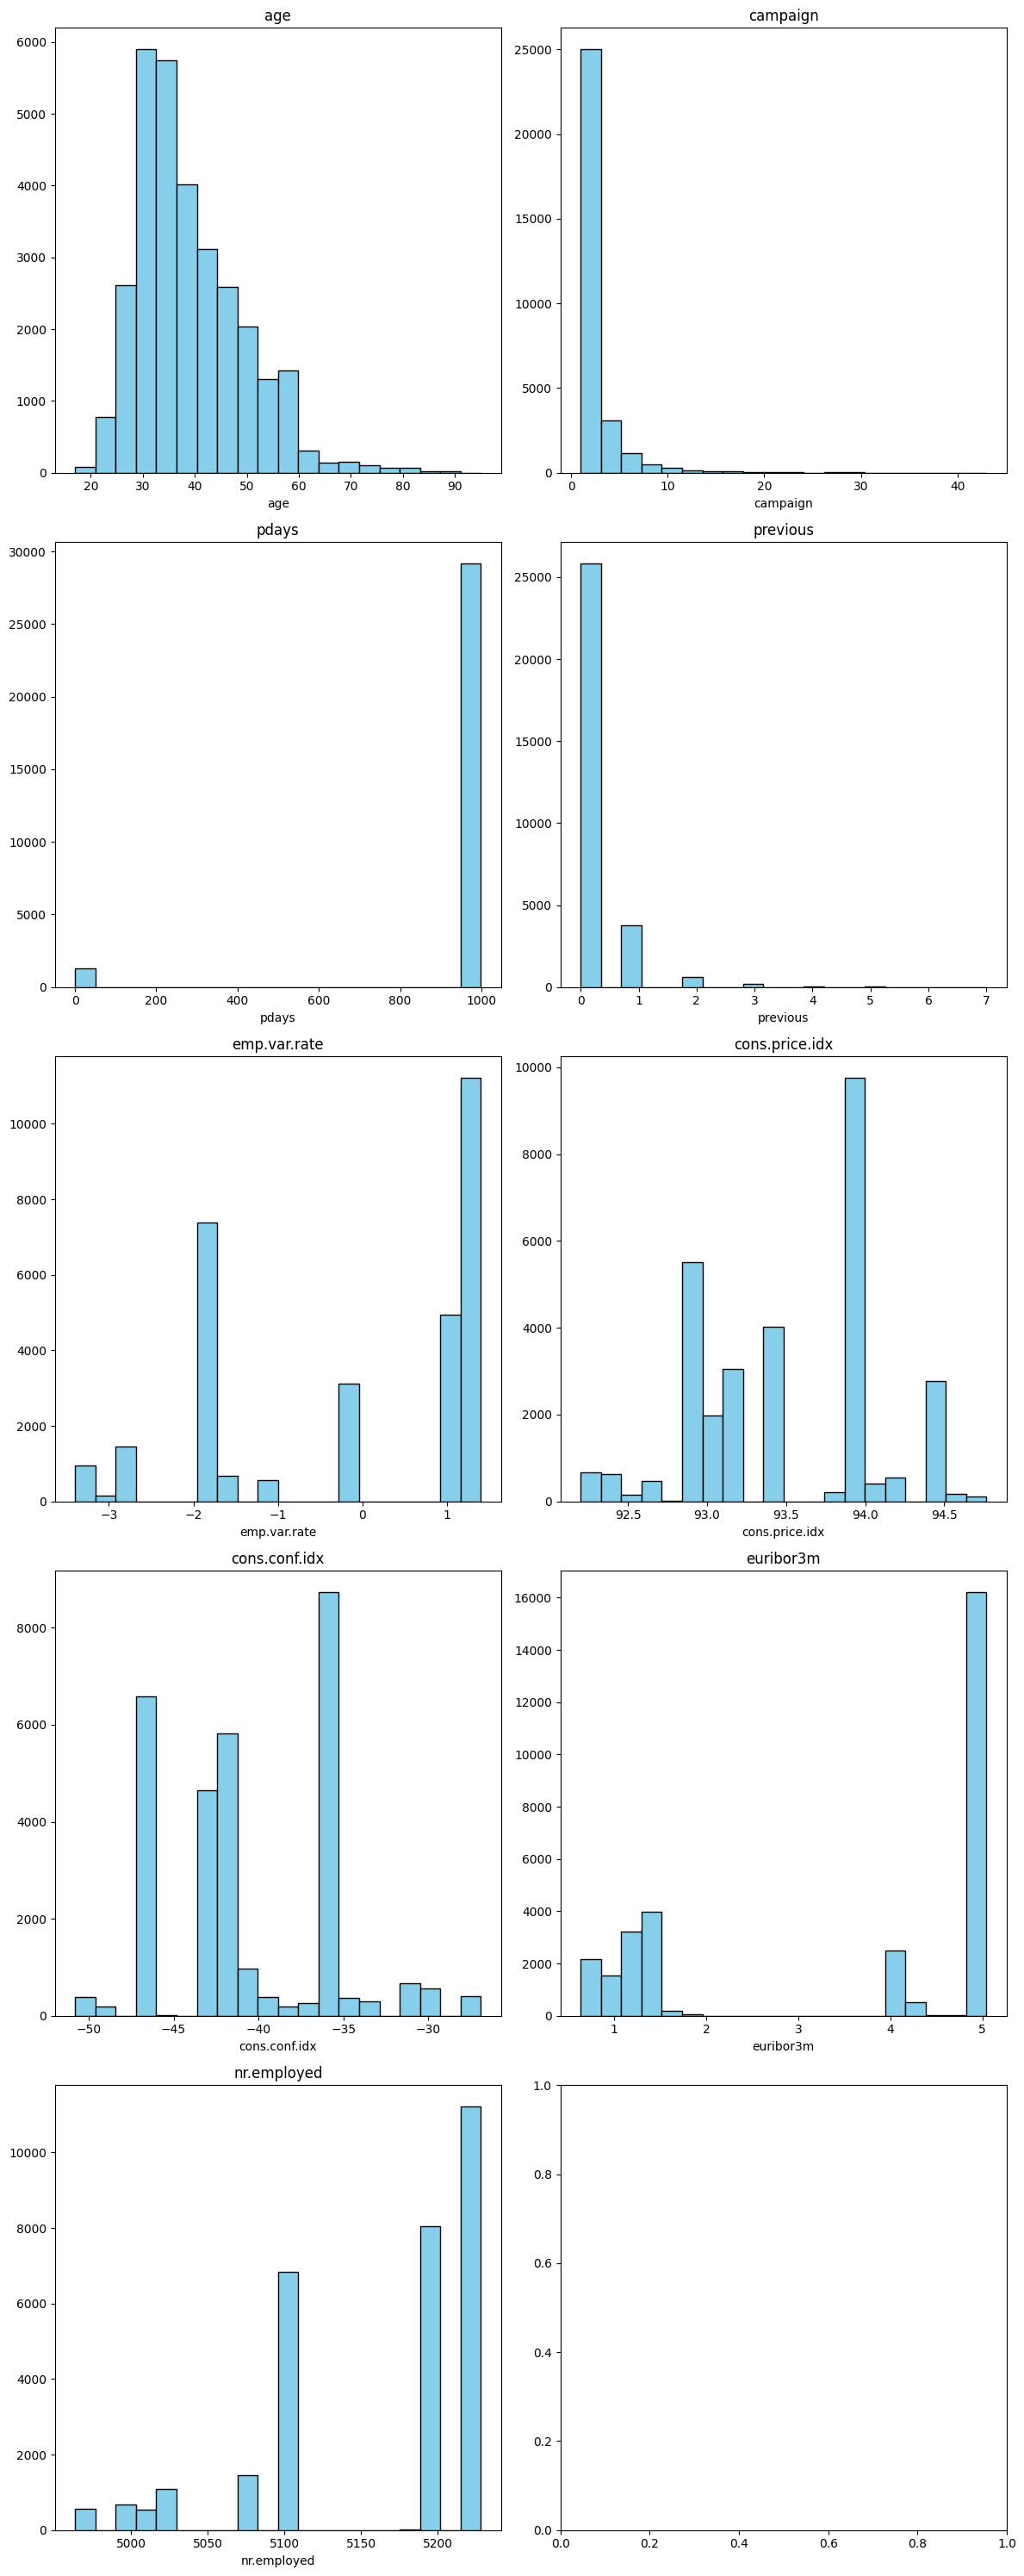

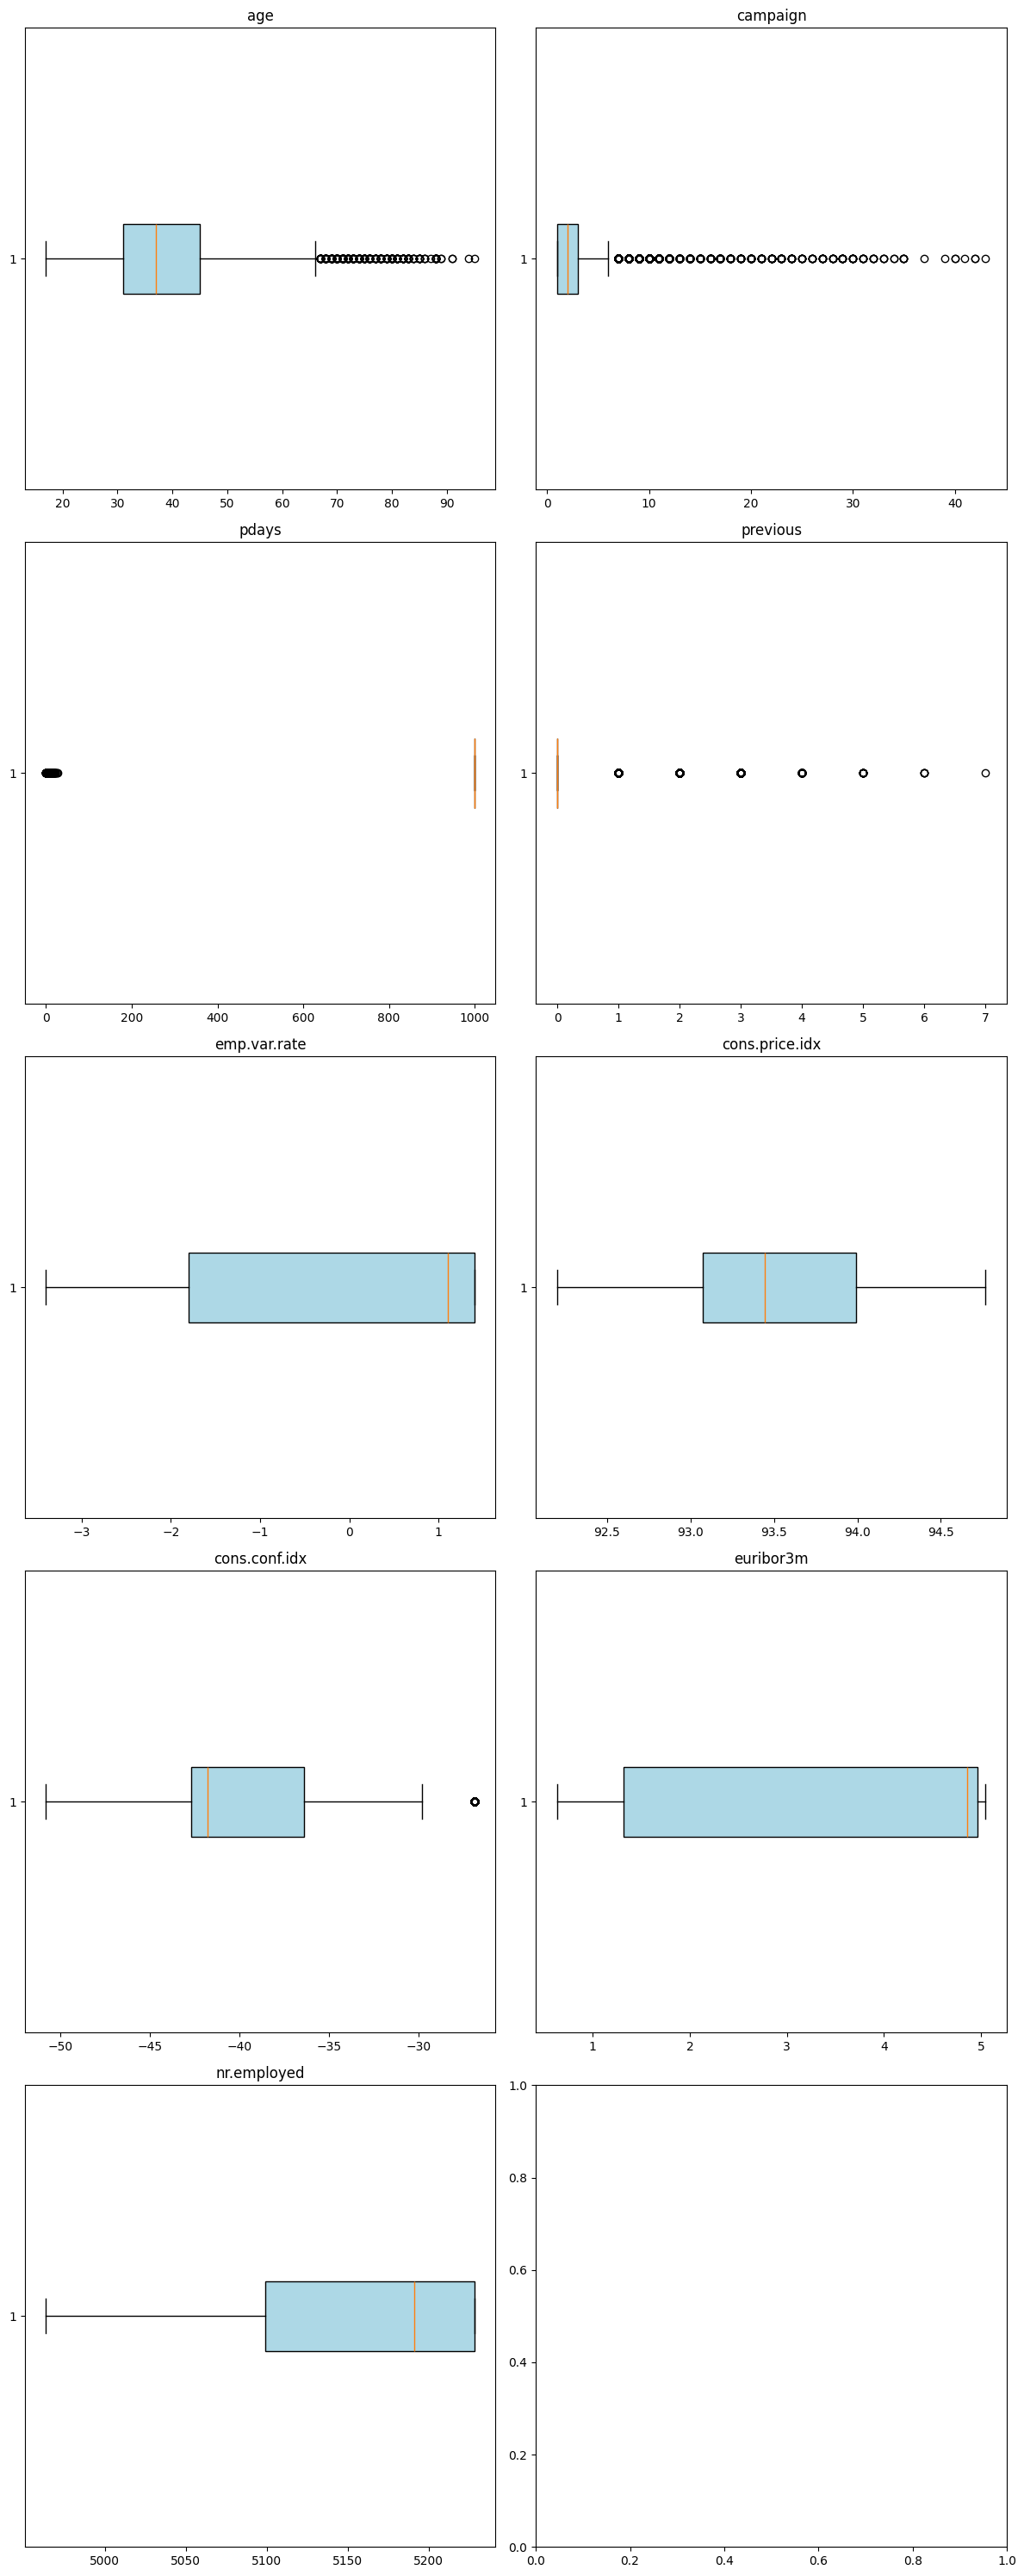

In [210]:
num_cols = df_train.select_dtypes(include=["number"])

num_features = len(num_cols.columns)
rows = int(np.ceil(num_features / 2))

# Histogram untuk kolom numerik
fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols.columns):
    axes[i].hist(num_cols[col], bins=20, color="skyblue", edgecolor="black")
    axes[i].set_title(col)
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

# Boxplot untuk kolom numerik
fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols.columns):
    axes[i].boxplot(num_cols[col], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


Berdasarkan histogram, distribusi usia responden menunjukkan pola yang mirip dengan distribusi normal, dengan mayoritas responden berada dalam rentang usia 30 hingga 50 tahun. Variabel `campaign` dan `previous` memiliki distribusi yang condong ke kiri. Variabel `pdays` tampaknya memiliki mayoritas nilai 999, yang mungkin menunjukkan tidak adanya kontak sebelumnya dalam sistem. Beberapa variabel ekonomi seperti `emp.var.rate`, `cons.price.idx`, dan `euribor3m` menunjukkan distribusi dengan puncak pada beberapa titik tertentu, mengindikasikan adanya pola ekonomi yang khas dalam data.

Sementara itu, pada boxplot terlihat adanya *outlier* yang signifikan pada beberapa variabel, terutama pada `age`, `campaign`, dan `pdays`. *Outlier* pada campaign menunjukkan bahwa beberapa individu dihubungi dalam jumlah yang jauh lebih banyak dibanding mayoritas responden lainnya. `Pdays` juga menunjukkan bahwa sebagian besar nasabah memiliki nilai 999, sementara sebagian kecil memiliki nilai lebih rendah. Variabel ekonomi seperti `cons.conf.idx` dan `euribor3m` memiliki rentang nilai yang lebih terkonsentrasi, tetapi tetap menunjukkan adanya beberapa pencilan.

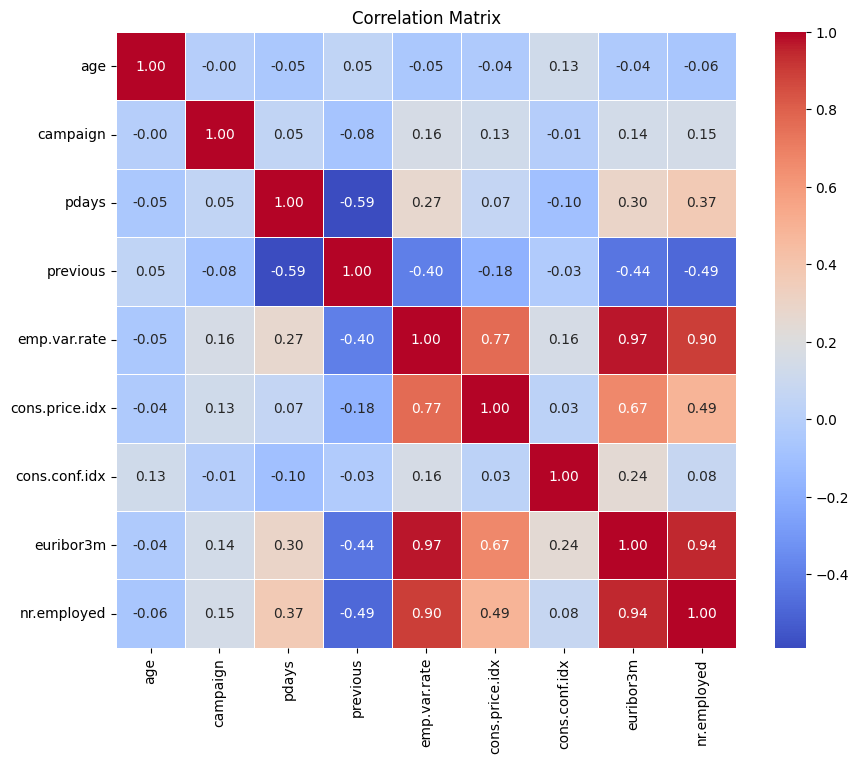

In [211]:
num_cols = df_train.select_dtypes(include=[np.number]).columns
correlation_matrix = df_train[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Matrix")
plt.show()

Berdasarkan matriks korelasi yang ditampilkan, terdapat beberapa hubungan yang cukup kuat antara variabel-variabel dalam dataset:

1. **Hubungan Positif Kuat:**
   - *Emp.var.rate* memiliki korelasi tinggi dengan *euribor3m* (0.97) dan *nr.employed* (0.90). Hal ini menunjukkan bahwa variabel tingkat perubahan ketenagakerjaan memiliki hubungan yang sangat erat dengan tingkat suku bunga dan jumlah pekerja yang dipekerjakan.
   - *Cons.price.idx* memiliki korelasi cukup tinggi dengan *emp.var.rate* (0.77) dan *euribor3m* (0.67), yang menunjukkan bahwa indeks harga konsumen cenderung bergerak sejalan dengan perubahan variabel ekonomi lainnya.

2. **Hubungan Negatif Kuat:**
   - *Previous* memiliki korelasi negatif cukup kuat dengan *pdays* (-0.59), menunjukkan bahwa semakin sering seseorang dihubungi sebelumnya (*previous* tinggi), maka semakin kecil nilai *pdays* (waktu sejak terakhir dihubungi cenderung lebih singkat).
   - *Previous* juga berkorelasi negatif dengan *emp.var.rate* (-0.40) dan *nr.employed* (-0.49), yang mungkin mengindikasikan bahwa dalam kondisi ekonomi tertentu, jumlah interaksi sebelumnya dengan pelanggan bisa berbeda.

3. **Hubungan Lemah atau Tidak Signifikan:**
   - *Age* tampaknya tidak memiliki korelasi yang kuat dengan variabel lain, dengan nilai yang mendekati nol.
   - *Campaign* juga memiliki korelasi rendah dengan sebagian besar variabel lain, menunjukkan bahwa jumlah kampanye yang dijalankan tidak terlalu dipengaruhi oleh faktor ekonomi utama.

Secara keseluruhan, eksplorasi menggunakan matriks korelasii= ini menunjukkan bahwa variabel ekonomi (*emp.var.rate*, *euribor3m*, *nr.employed*, *cons.price.idx*) memiliki keterkaitan yang cukup kuat satu sama lain, sementara variabel terkait kampanye dan karakteristik individu (seperti *age* dan *campaign*) cenderung memiliki hubungan yang lebih lemah terhadap variabel lain.

job: 11 unique values
marital: 3 unique values
education: 7 unique values
default: 2 unique values
housing: 2 unique values
loan: 2 unique values
contact: 2 unique values
month: 10 unique values
day_of_week: 5 unique values
poutcome: 3 unique values
y: 2 unique values


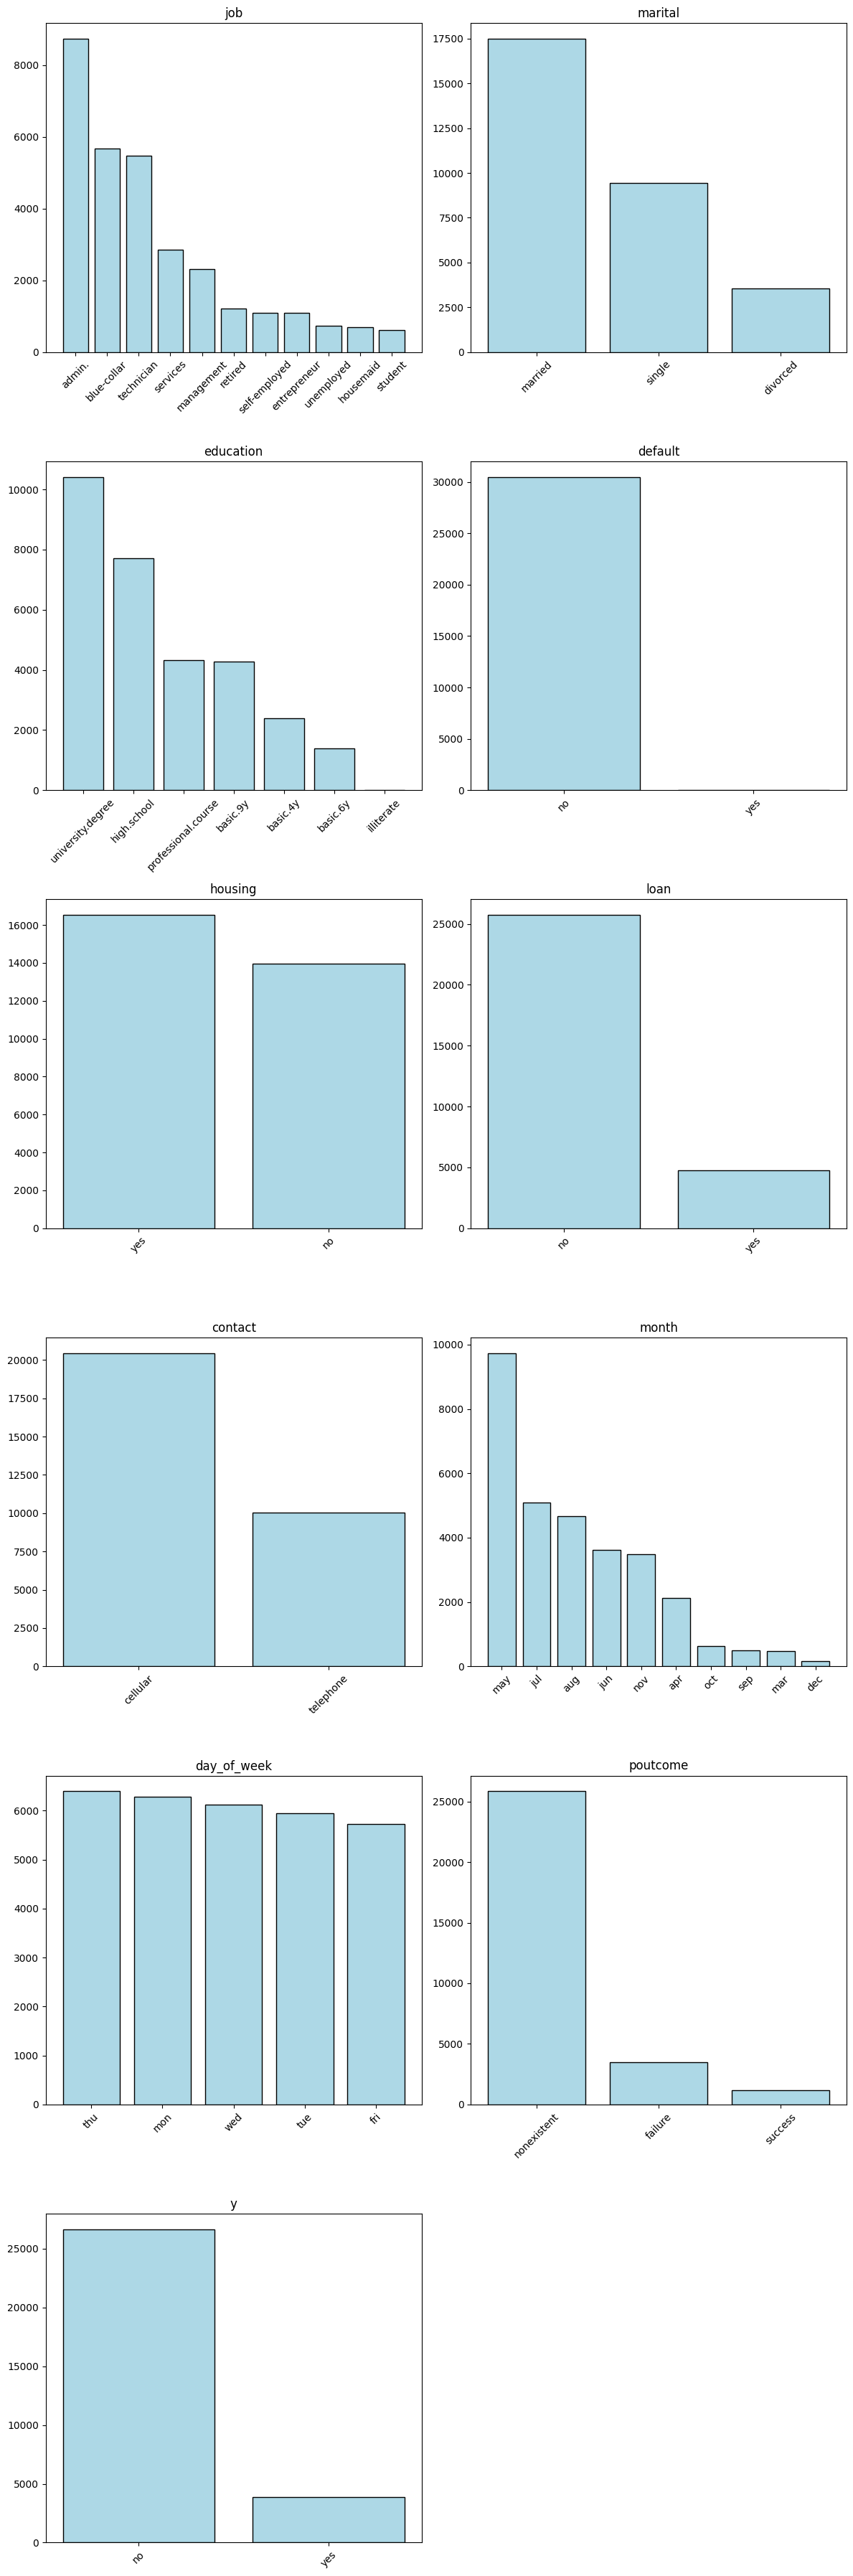

In [212]:
for col in df_train.select_dtypes(include=["object"]).columns:
    print(f"{col}: {df_train[col].nunique()} unique values")
for col in ["job", "marital", "education", "default", "housing", "loan",
            "contact", "month", "day_of_week", "poutcome", "y"]:
    df_train[col] = df_train[col].astype("category")

cat_cols = df_train.select_dtypes(include=["category"])
num_cats = len(cat_cols.columns)

if num_cats > 0:
    rows = int(np.ceil(num_cats / 2))

    fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols.columns):
        counts = cat_cols[col].value_counts()
        axes[i].bar(counts.index, counts.values, color="lightblue", edgecolor="black")
        axes[i].set_title(col)
        axes[i].tick_params(axis="x", rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada kolom kategorikal dalam dataset.")


- Mayoritas klien memiliki pekerjaan di sektor *administrasi, blue-collar*, atau *technician*.
- Sebagian besar berstatus *married*, memiliki pendidikan *university degree*, dan tidak memiliki riwayat kredit macet.
- Kampanye lebih sering dilakukan via *cellular* dan lebih sering dilakukan di bulan Mei.
- Tingkat keberhasilan kampanye masih cukup rendah, sehingga perlu strategi lebih efektif.

Berdasarkan hasil eksplorasi data, ditemukan beberapa variabel yang menunjukkan anomali dalam distribusinya. Salah satu variabel yang mengalami anomali adalah `default`, di mana seluruh observasi hanya memiliki satu kategori, yaitu "no". Keadaan ini menunjukkan bahwa variabel `default` tidak memiliki variasi yang cukup untuk memberikan informasi yang berarti dalam analisis atau pemodelan.

Selain itu, variabel `pdays` dan `previous` juga menunjukkan pola distribusi yang tidak merata, dengan sebagian besar observasi memiliki nilai yang seragam. Kondisi ini mengindikasikan bahwa kedua variabel tersebut mungkin tidak memberikan kontribusi yang signifikan dalam membedakan atau memprediksi variabel target.

Dengan mempertimbangkan aspek informatif dan relevansi terhadap model, variabel-variabel tersebut dapat direduksi atau dikeluarkan dari analisis guna menghindari redundansi serta meningkatkan efisiensi dan interpretabilitas model yang akan dibangun.

In [213]:
df_train = df_train.drop(columns=["default", "pdays", "previous"])

## Data Testing

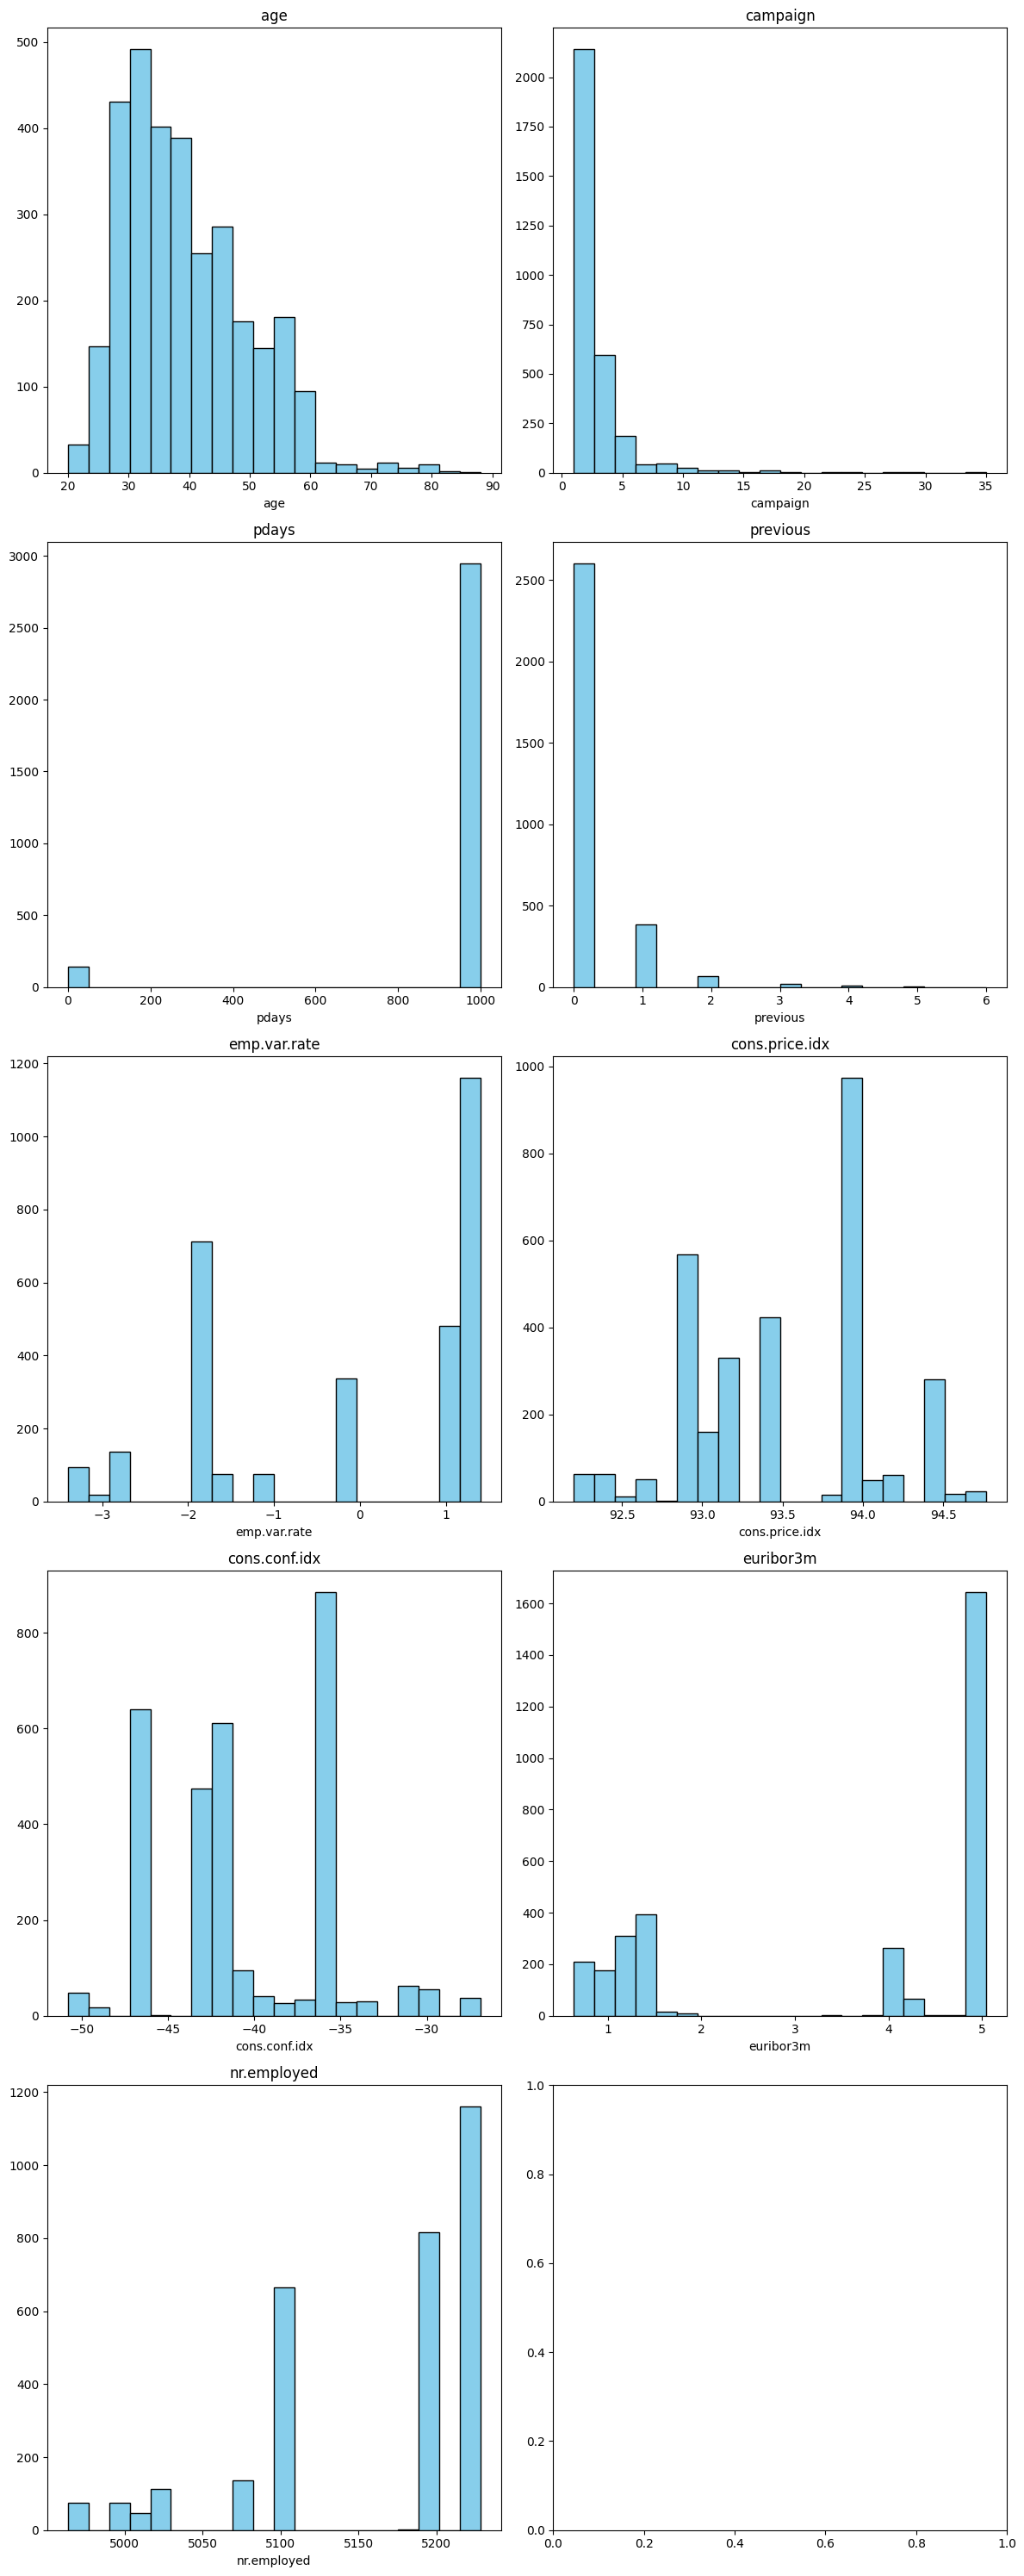

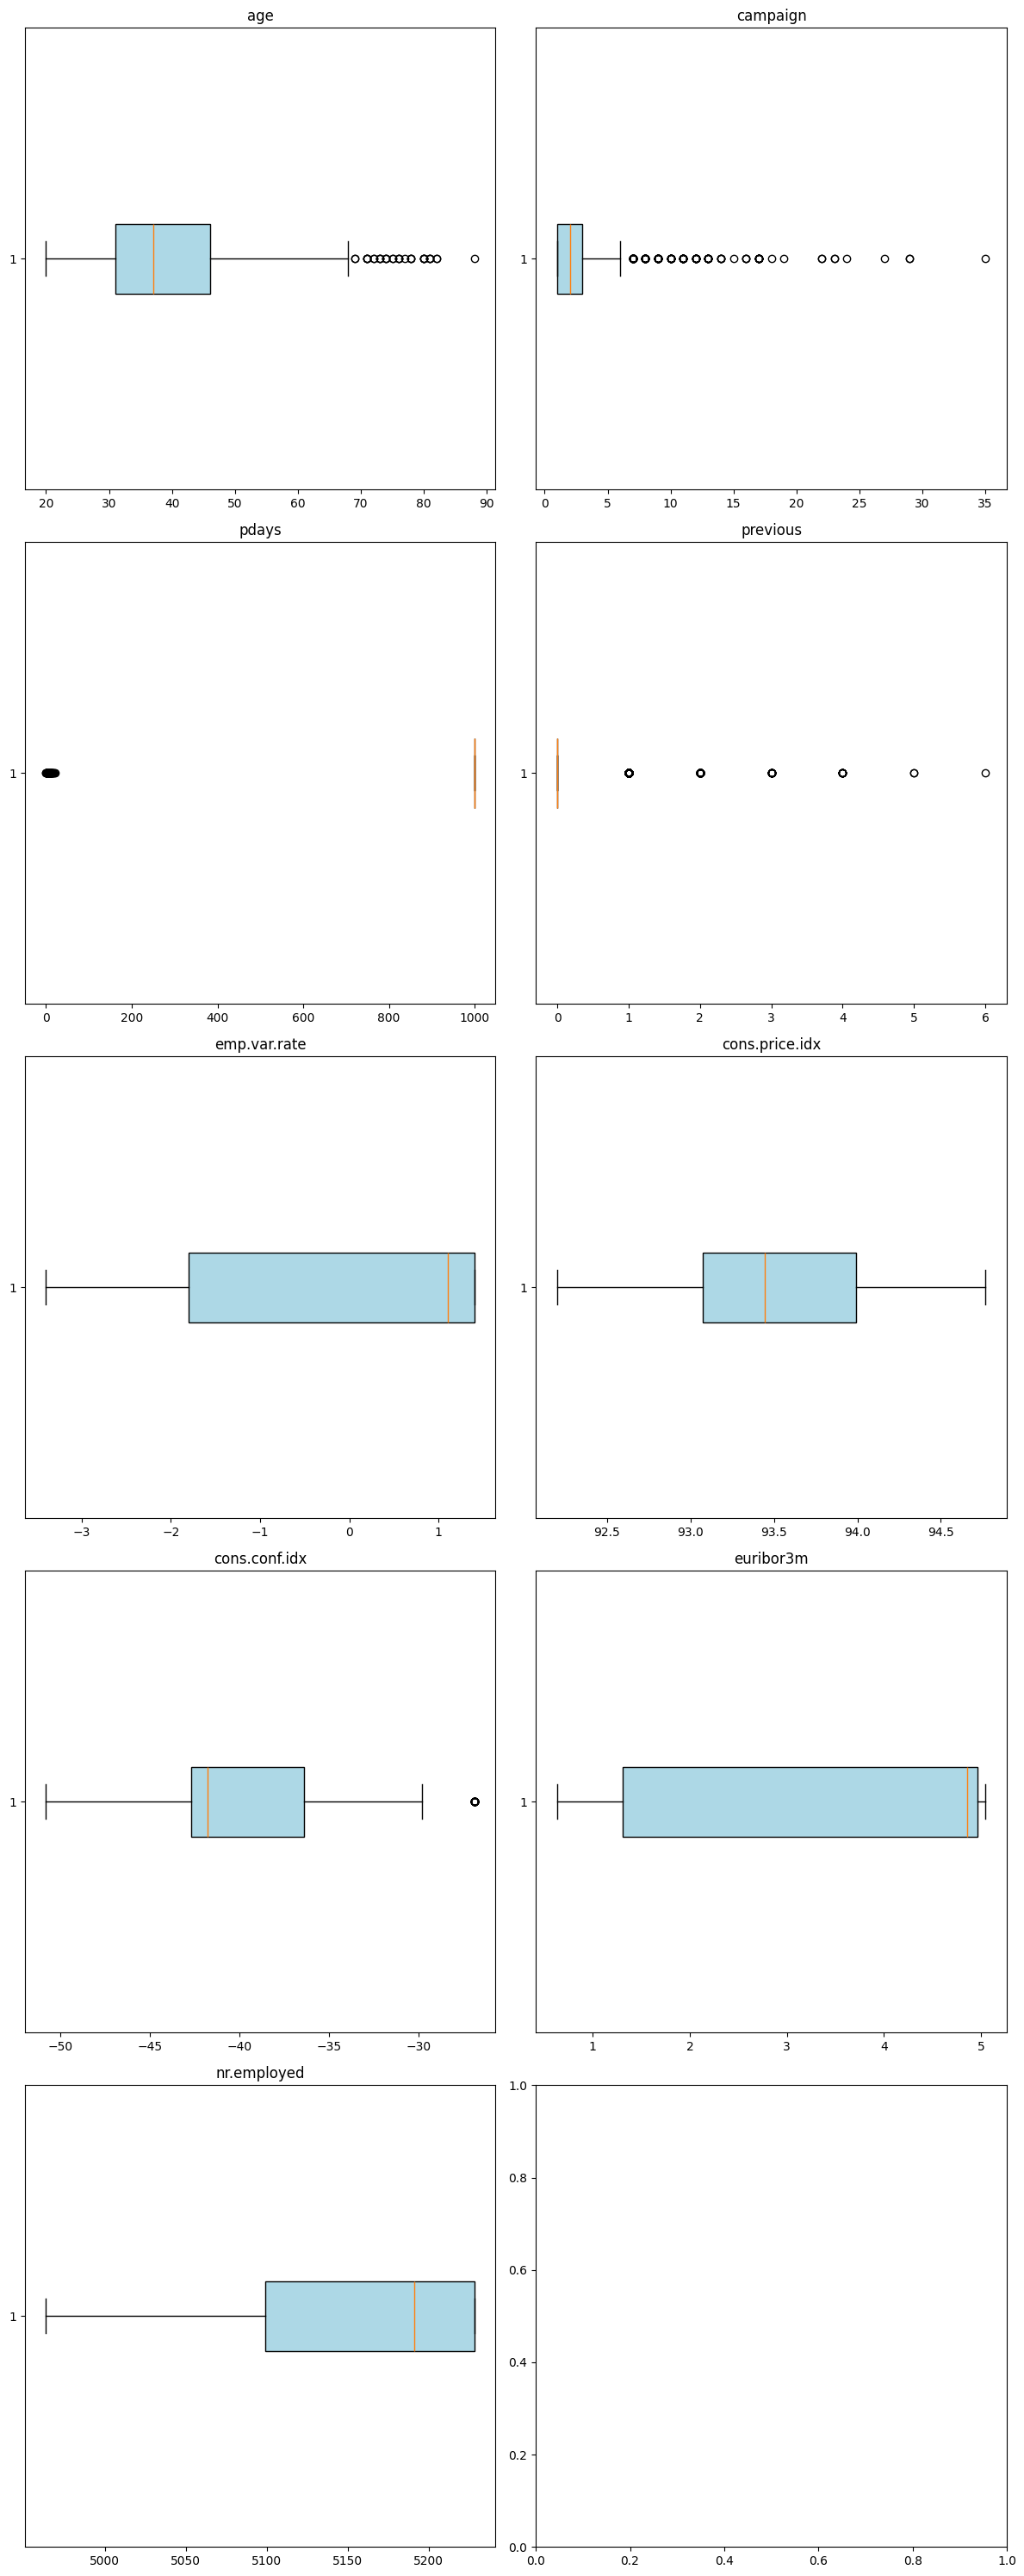

In [214]:
num_cols = df_test.select_dtypes(include=["number"])
num_features = len(num_cols.columns)
rows = int(np.ceil(num_features / 2))

# Histogram untuk kolom numerik
fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols.columns):
    axes[i].hist(num_cols[col], bins=20, color="skyblue", edgecolor="black")
    axes[i].set_title(col)
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

# Boxplot untuk kolom numerik
fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols.columns):
    axes[i].boxplot(num_cols[col], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


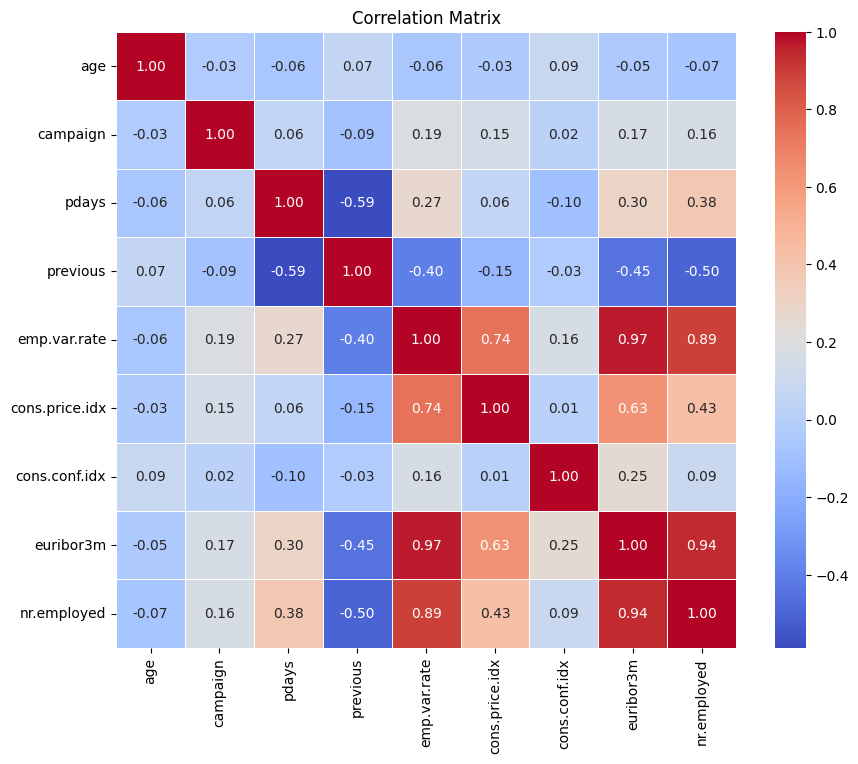

In [215]:
num_cols = df_test.select_dtypes(include=[np.number]).columns
correlation_matrix = df_test[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Correlation Matrix")
plt.show()

job: 11 unique values
marital: 3 unique values
education: 7 unique values
default: 2 unique values
housing: 2 unique values
loan: 2 unique values
contact: 2 unique values
month: 10 unique values
day_of_week: 5 unique values
poutcome: 3 unique values
y: 2 unique values


<ipython-input-216-163c36e8df79>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[col] = df_test[col].astype("category")
<ipython-input-216-163c36e8df79>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[col] = df_test[col].astype("category")
<ipython-input-216-163c36e8df79>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

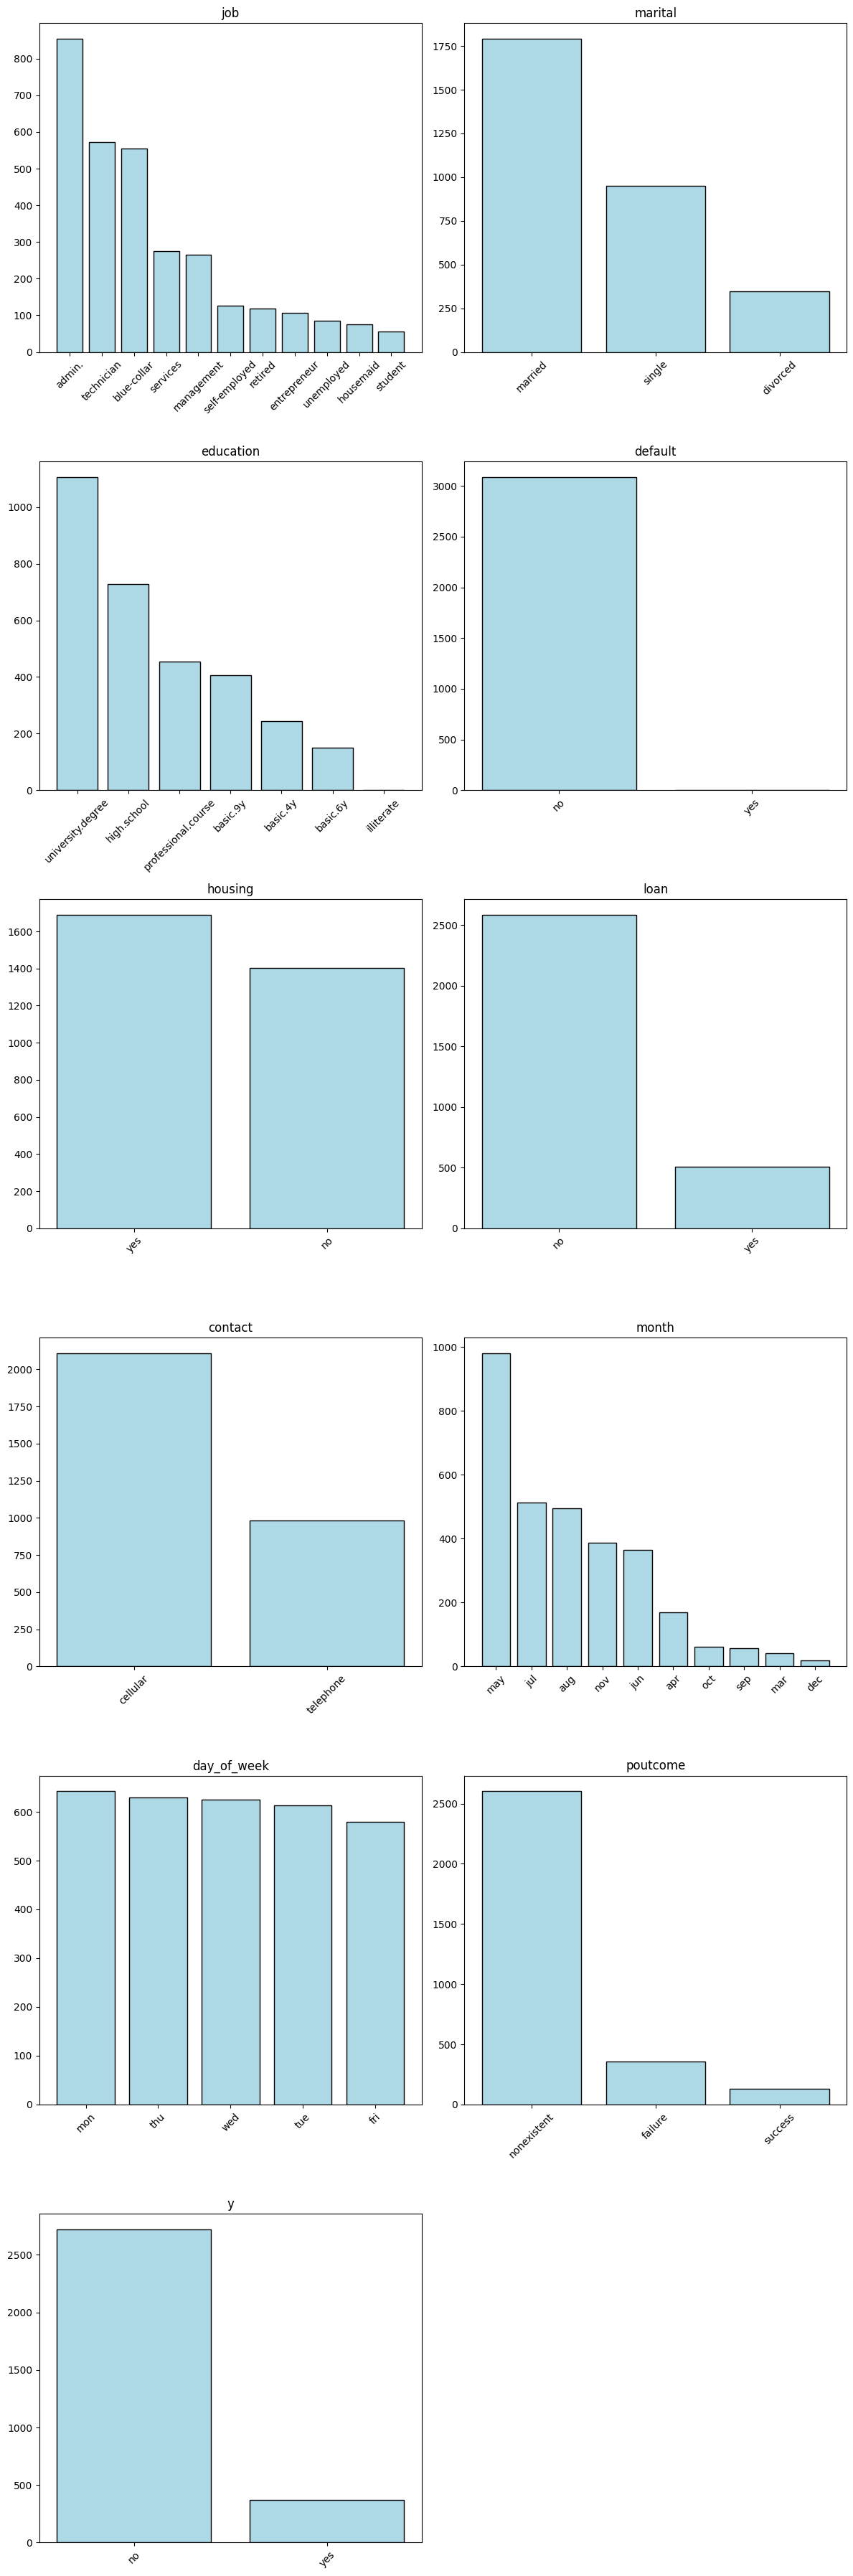

In [216]:
for col in df_test.select_dtypes(include=["object"]).columns:
    print(f"{col}: {df_test[col].nunique()} unique values")
for col in ["job", "marital", "education", "default", "housing", "loan",
            "contact", "month", "day_of_week", "poutcome", "y"]:
    df_test[col] = df_test[col].astype("category")

cat_cols = df_test.select_dtypes(include=["category"])
num_cats = len(cat_cols.columns)

if num_cats > 0:
    rows = int(np.ceil(num_cats / 2))

    fig, axes = plt.subplots(rows, 2, figsize=(12, 6 * rows))
    axes = axes.flatten()

    for i, col in enumerate(cat_cols.columns):
        counts = cat_cols[col].value_counts()
        axes[i].bar(counts.index, counts.values, color="lightblue", edgecolor="black")
        axes[i].set_title(col)
        axes[i].tick_params(axis="x", rotation=45)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada kolom kategorikal dalam dataset.")

Hasil eksplorasi terhadap data *testing* menunjukkan pola yang serupa dengan yang ditemukan pada data *training*. Variabel `default` tetap hanya memiliki satu kategori, yaitu *"no"*, sementara variabel `pday` dan `previous` masih menunjukkan distribusi yang tidak merata dengan mayoritas observasi memiliki nilai yang seragam.  

Konsistensi pola ini antara data *training* dan *testing* mengindikasikan bahwa karakteristik anomali pada variabel-variabel tersebut bukan sekadar hasil sampel tertentu, melainkan merupakan bagian dari struktur data secara keseluruhan. Oleh karena itu, langkah penanganan yang telah diterapkan pada data *training*, seperti reduksi atau penghapusan variabel yang tidak informatif, juga dapat dilakukan pada data *testing* guna menjaga konsistensi dalam analisis serta meningkatkan efisiensi dan performa model yang akan dibangun.

In [217]:
df_test = df_test.drop(columns=["default", "pdays", "previous"])

# Data Preprocessing

## Data Training

In [218]:
for col in df_train.select_dtypes(include=['object']):
    df_train[col] = df_train[col].astype('category').cat.codes

for col in df_train.select_dtypes(include=['object']):
    df_train[col] = list(to_categorical(df_train[col]))

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30488 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             30488 non-null  int64   
 1   job             30488 non-null  category
 2   marital         30488 non-null  category
 3   education       30488 non-null  category
 4   housing         30488 non-null  category
 5   loan            30488 non-null  category
 6   contact         30488 non-null  category
 7   month           30488 non-null  category
 8   day_of_week     30488 non-null  category
 9   campaign        30488 non-null  int64   
 10  poutcome        30488 non-null  category
 11  emp.var.rate    30488 non-null  float64 
 12  cons.price.idx  30488 non-null  float64 
 13  cons.conf.idx   30488 non-null  float64 
 14  euribor3m       30488 non-null  float64 
 15  nr.employed     30488 non-null  float64 
 16  y               30488 non-null  category
dtypes: category(10), 

Dataset telah melalui proses pra-pemrosesan yang mengonversi variabel kategori ke tipe data category, yang dapat mempercepat komputasi dalam model machine learning. Selanjutnya, untuk digunakan dalam pemodelan berbasis numerik, variabel kategori mungkin perlu dikodekan lebih lanjut menggunakan teknik seperti label encoding atau one-hot encoding.

In [219]:
df_train.isnull().sum()

,0
age,0
job,0
marital,0
education,0
housing,0
loan,0
contact,0
month,0
day_of_week,0
campaign,0


In [220]:
display(df_train)

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,yes,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,telephone,may,mon,1,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,yes,no,cellular,nov,fri,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,cellular,nov,fri,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,yes,no,cellular,nov,fri,2,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,cellular,nov,fri,1,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Data Testing

In [221]:
for col in df_test.select_dtypes(include=['object']):
    df_test[col] = df_test[col].astype('category').cat.codes

for col in df_test.select_dtypes(include=['object']):
    df_test[col] = list(to_categorical(df_test[col]))

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3090 entries, 0 to 4118
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             3090 non-null   int64   
 1   job             3090 non-null   category
 2   marital         3090 non-null   category
 3   education       3090 non-null   category
 4   housing         3090 non-null   category
 5   loan            3090 non-null   category
 6   contact         3090 non-null   category
 7   month           3090 non-null   category
 8   day_of_week     3090 non-null   category
 9   campaign        3090 non-null   int64   
 10  poutcome        3090 non-null   category
 11  emp.var.rate    3090 non-null   float64 
 12  cons.price.idx  3090 non-null   float64 
 13  cons.conf.idx   3090 non-null   float64 
 14  euribor3m       3090 non-null   float64 
 15  nr.employed     3090 non-null   float64 
 16  y               3090 non-null   category
dtypes: category(10), fl

In [222]:
df_test.isnull().sum()

,0
age,0
job,0
marital,0
education,0
housing,0
loan,0
contact,0
month,0
day_of_week,0
campaign,0


In [223]:
display(df_test)

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,yes,no,cellular,may,fri,2,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,telephone,may,fri,4,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,yes,no,telephone,jun,wed,1,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
4,47,admin.,married,university.degree,yes,no,cellular,nov,mon,1,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,cellular,sep,thu,3,failure,-1.1,94.199,-37.5,0.884,4963.6,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,yes,yes,cellular,jul,thu,1,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,yes,no,telephone,jul,fri,1,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,cellular,may,mon,2,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,cellular,aug,fri,1,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


## *Features Scaling*

In [224]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
train_X = df_train.iloc[:, :-1]
test_X = df_test.iloc[:, :-1]
train_y = df_train.iloc[:, -1]
test_y = df_test.iloc[:, -1]

# One-hot encoding untuk fitur kategorikal
train_X = pd.get_dummies(train_X)
test_X = pd.get_dummies(test_X)
train_X, test_X = train_X.align(test_X, join="left", axis=1, fill_value=0)
train_X = train_X.values
test_X = test_X.values

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

# Label Encoding untuk target y
le = LabelEncoder()
train_y = le.fit_transform(train_y)
test_y = le.transform(test_y)

# One-hot encoding untuk target y
train_y = to_categorical(train_y, num_classes=2)
test_y = to_categorical(test_y, num_classes=2)

print("Shape train_X:", train_X.shape)
print("Shape test_X:", test_X.shape)
print("Shape train_y:", train_y.shape)
print("Shape test_y:", test_y.shape)


Shape train_X: (30488, 52)
Shape test_X: (3090, 52)
Shape train_y: (30488, 2)
Shape test_y: (3090, 2)


- `train_X.shape = (30488, 52)` → Data training memiliki **30.488 sampel** dan **52 fitur** setelah one-hot encoding.  
- `test_X.shape = (3090, 52)` → Data testing memiliki **3.090 sampel** dengan jumlah fitur yang sama.  
- `train_y.shape = (30488, 2)` dan `test_y.shape = (3090, 2)` menunjukkan bahwa target kini memiliki dua kolom, sesuai hasil one-hot encoding (dua kelas: ‘yes’ dan ‘no’).  

Dataset telah berhasil dikonversi ke bentuk numerik dengan preprocessing yang lengkap, mencakup one-hot encoding untuk fitur kategori, normalisasi untuk fitur numerik, serta encoding target untuk memastikan model dapat memahami dan memprosesnya dengan baik.

## SMOTE

Berdasarkan hasil eksplorasi data, ditemukan adanya ketidakseimbangan pada variabel target, di mana jumlah observasi dengan kelas "no" jauh lebih banyak dibandingkan dengan kelas "yes". Ketidakseimbangan ini dapat menyebabkan model cenderung lebih berpihak pada kelas mayoritas, sehingga mengurangi kemampuan model dalam mengenali pola dari kelas minoritas.  

Untuk mengatasi permasalahan ini, diperlukan teknik penyeimbangan data, salah satunya adalah *Synthetic Minority Over-sampling Technique* (SMOTE). Metode ini bekerja dengan membuat sampel sintetis untuk kelas minoritas berdasarkan distribusi data yang ada, sehingga proporsi antara kedua kelas menjadi lebih seimbang. Dengan demikian, model dapat dilatih secara lebih adil dan meningkatkan kemampuannya dalam melakukan prediksi terhadap kedua kelas secara optimal.

In [225]:
X = train_X
y = train_y.argmax(axis=1)

# Inisialisasi SMOTE
smote = SMOTE(random_state=123)

# SMOTE pada dataset
X_resampled, y_resampled = smote.fit_resample(X, y)
print(pd.Series(y_resampled).value_counts())
y_resampled = to_categorical(y_resampled, num_classes=2)

train_X = X_resampled
train_y = y_resampled

0    26629
1    26629
Name: count, dtype: int64


Berdasarkan hasil penerapan SMOTE, distribusi data target berhasil diseimbangkan, sehingga jumlah amatan pada kedua kelas kini setara, yaitu sebanyak 26.629 amatan untuk masing-masing kelas. Dengan demikian, permasalahan *class imbalance* yang sebelumnya ada dalam dataset telah teratasi, yang diharapkan dapat meningkatkan kinerja model dalam melakukan prediksi, terutama dalam mengklasifikasikan kelas minoritas.

# Pemodelan dengan 1 *Hidden Layer*

In [226]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(train_X.shape[1],)),
    Dense(train_y.shape[1], activation='softmax')
])

model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 256)                 │          13,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,082 (55.01 KB)

 Trainable params: 14,082 (55.01 KB)

 Non-trainable params: 0 (0.00 B)

Hasil pemodelan Artificial Neural Network (ANN) menunjukkan bahwa model terdiri dari 1 hidden layer dengan detail sebagai berikut:  

1. Dense Layer 1 (Hidden Layer):  
   - Memiliki 256 neuron dengan jumlah parameter sebanyak 13.568.  
   - Jumlah parameter dihitung sebagai:  
     (jumlah fitur input × jumlah neuron) + bias = (52 × 256) + 256 = 13.568  

2. Dense Layer 2 (Output Layer):  
   - Memiliki 2 neuron, sesuai dengan jumlah kelas pada variabel target.  
   - Menggunakan 514 parameter, dihitung sebagai:  
     (256 × 2) + 2 = 514  

Kesimpulan:  
- Total parameter dalam model adalah 14.082, yang seluruhnya dapat di-train (trainable).  
- Model ini relatif sederhana dengan hanya 1 hidden layer, yang dapat bekerja dengan baik untuk masalah klasifikasi biner.

Training 1 - 10 epochs...
Epoch 1/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6939 - loss: 0.5780 - val_accuracy: 0.6025 - val_loss: 0.6851
Epoch 2/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7787 - loss: 0.4978 - val_accuracy: 0.5708 - val_loss: 0.8163
Epoch 3/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7785 - loss: 0.4915 - val_accuracy: 0.6028 - val_loss: 0.7254
Epoch 4/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7870 - loss: 0.4743 - val_accuracy: 0.6075 - val_loss: 0.7001
Epoch 5/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7933 - loss: 0.4603 - val_accuracy: 0.6277 - val_loss: 0.6080
Epoch 6/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7949 - loss: 0.4524 - val_accuracy: 0.6271 - val_loss: 0.6268
Epoch 7/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8009 - loss: 0.4381 - val_accuracy: 0.6508 - val_loss: 0.5834
Epoch 8/10
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8028 - loss:

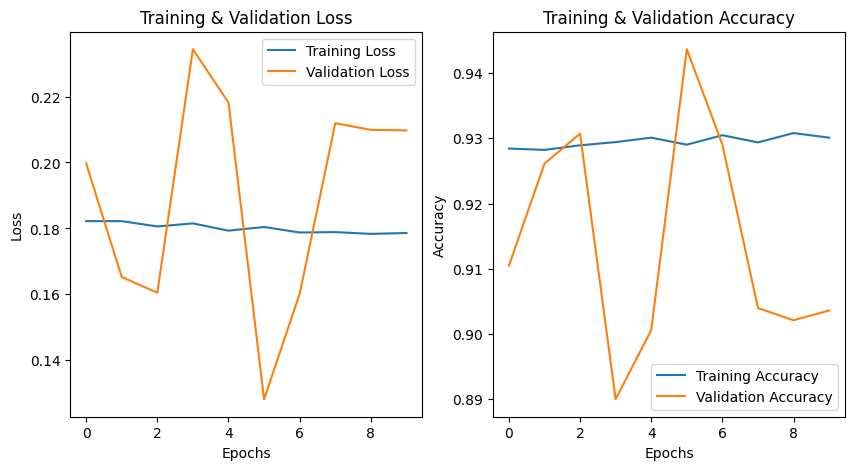

In [227]:
epochs_per_step = 10
total_epochs = 100

for i in range(0, total_epochs, epochs_per_step):
    print(f"Training {i+1} - {i+epochs_per_step} epochs...")
    history = model.fit(
        train_X, train_y,
        shuffle=True,
        epochs=epochs_per_step,
        batch_size=256,
        validation_split=0.2,
    )

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()

Hasil visualisasi menunjukkan tren loss dan akurasi untuk data training serta validasi selama 10 epoch.  

1. **Training & Validation Loss**:  
   - Loss pada data training cenderung stabil dengan sedikit penurunan.  
   - Loss pada data validasi menunjukkan fluktuasi yang cukup tinggi, yang dapat mengindikasikan ketidakstabilan dalam proses generalisasi model.  

2. **Training & Validation Accuracy**:  
   - Akurasi training relatif stabil di sekitar 93%.  
   - Akurasi validasi mengalami fluktuasi yang signifikan, dengan peningkatan dan penurunan drastis, yang bisa mengindikasikan adanya overfitting atau model yang kurang stabil.  

**Kesimpulan**:  
- Fluktuasi yang besar pada loss dan akurasi validasi dapat menunjukkan bahwa model kurang stabil dan mungkin memerlukan perbaikan, seperti pengurangan learning rate, penambahan regulasi (dropout atau L2 regularization), atau peningkatan jumlah data pelatihan.  
- Performa training yang cukup stabil namun validasi yang tidak konsisten dapat menjadi indikasi bahwa model terlalu fit terhadap data training dan kurang mampu melakukan generalisasi dengan baik.

In [228]:
scores = model.evaluate(test_X, test_y)

# Menampilkan hasil evaluasi (loss dan accuracy)
print(f"Test Loss: {scores[0]:.4f}")
print(f"Test Accuracy: {scores[1]:.4f}")

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9326 - loss: 0.1870
Test Loss: 0.1800
Test Accuracy: 0.9333


Model menunjukkan performa yang baik dengan **test loss sebesar 0.1800** dan **test accuracy 93.33%**, yang mengindikasikan prediksi yang akurat dengan tingkat kesalahan rendah. Akurasi yang tinggi menunjukkan model mampu mengenali pola dalam data uji dengan baik.

# Pemodelan dengan 2 *Hidden Layer* dan *Dropout*

In [229]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(train_X.shape[1],)),  # Hidden Layer 1
    Dropout(0.2),
    Dense(128, activation='relu'),  # Hidden Layer 2
    Dropout(0.2),
    Dense(train_y.shape[1], activation='softmax')  # Output Layer
])

# Mengkompilasi model
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# Menampilkan ringkasan model
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 256)                 │          13,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,722 (182.51 KB)

 Trainable params: 46,722 (182.51 KB)

 Non-trainable params: 0 (0.00 B)

Model yang digunakan memiliki dua hidden layer dengan jumlah parameter sebesar 46,722. Hidden layer pertama terdiri dari 256 neuron, sedangkan hidden layer kedua memiliki 128 neuron, masing-masing diikuti oleh Dropout layer untuk mengurangi risiko overfitting. Lapisan output menggunakan 2 neuron, sesuai dengan jumlah kelas pada target. Struktur ini menunjukkan bahwa model lebih kompleks dibandingkan sebelumnya, yang dapat meningkatkan kemampuan generalisasi, tetapi perlu dievaluasi untuk memastikan tidak terjadi overfitting atau underfitting.

In [230]:
# Melatih model
history = model.fit(
    train_X, train_y,
    shuffle=True,
    epochs=100,
    batch_size=128,
    validation_split=0.2,
)

# Menampilkan ringkasan model
model.summary()

Epoch 1/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7423 - loss: 0.5365 - val_accuracy: 0.5949 - val_loss: 0.7321
Epoch 2/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7823 - loss: 0.4879 - val_accuracy: 0.6586 - val_loss: 0.5835
Epoch 3/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7946 - loss: 0.4620 - val_accuracy: 0.6412 - val_loss: 0.6283
Epoch 4/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8034 - loss: 0.4428 - val_accuracy: 0.6552 - val_loss: 0.6145
Epoch 5/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8097 - loss: 0.4303 - val_accuracy: 0.6974 - val_loss: 0.5565
Epoch 6/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8190 - loss: 0.4068 - val_accuracy: 0.7486 - val_loss: 0.4729
Epoch 7/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8294 - loss: 0.3923 - val_accuracy: 0.7620 - val_loss: 0.4603
Epoch 8/100
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8366 - loss: 0.3773 - val_accu

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 256)                 │          13,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,168 (547.54 KB)

 Trainable params: 46,722 (182.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 93,446 (365.03 KB)

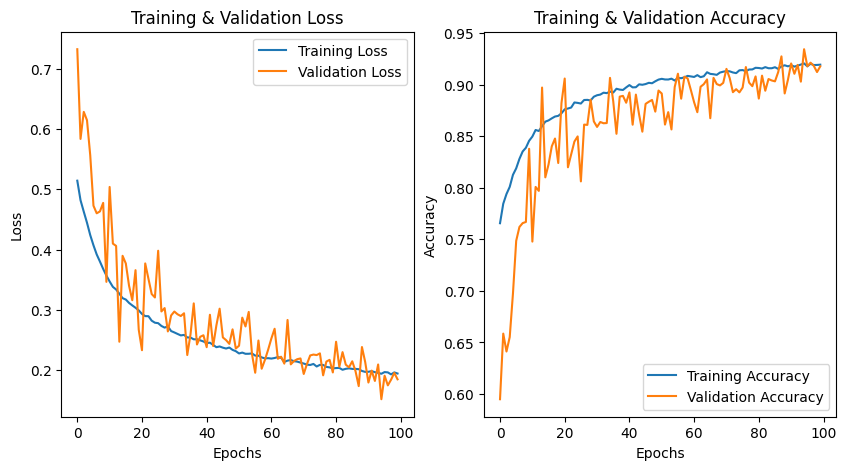

In [231]:
# Menampilkan plot pembelajaran model pada setiap epoch
plt.figure(figsize=(10, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot akurasi
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.show()

Grafik menunjukkan bahwa **training loss dan validation loss mengalami penurunan yang stabil**, menandakan model berhasil belajar dengan baik tanpa indikasi overfitting yang signifikan. Pada grafik akurasi, **training accuracy dan validation accuracy meningkat secara bertahap**, dengan validation accuracy yang sedikit fluktuatif tetapi tetap mendekati training accuracy. Hal ini menunjukkan bahwa model mampu melakukan generalisasi dengan baik terhadap data baru.

In [232]:
# Mengevaluasi model menggunakan data uji
scores = model.evaluate(test_X, test_y, verbose=0)  # verbose=0 untuk menyembunyikan output evaluasi

# Menampilkan hasil evaluasi (loss dan accuracy)
print(f"Test Loss: {scores[0]:.4f}")
print(f"Test Accuracy: {scores[1]:.4f}")

Test Loss: 0.1341
Test Accuracy: 0.9492


Hasil evaluasi menunjukkan bahwa model memiliki **test loss sebesar 0.1341** dan **test accuracy sebesar 94.92%**, yang menandakan bahwa model mampu melakukan prediksi dengan tingkat akurasi yang tinggi. Nilai loss yang rendah mengindikasikan bahwa kesalahan prediksi relatif kecil, sementara akurasi yang tinggi menunjukkan bahwa model dapat menggeneralisasi dengan baik terhadap data uji.

# Pemodelan dengan *Tuning Optimizer*

In [233]:
# Parameter model
input_dim = train_X.shape[1]  # Jumlah fitur input
output_dim = train_y.shape[1] # Jumlah kelas output

# Daftar optimizer yang akan diuji
optimizers = {
    "SGD": SGD(learning_rate=0.01),
    "Momentum_SGD": SGD(learning_rate=0.01, momentum=0.9),
    "Adam": Adam(learning_rate=0.01),
    "RMSprop": RMSprop(learning_rate=0.01)
}

# Fungsi untuk membuat model dengan optimizer tertentu
def create_model(optimizer):
    model = Sequential([
        Dense(64, activation="relu", input_shape=(input_dim,)),  # Hidden Layer 1
        Dense(output_dim, activation="softmax")  # Output Layer
    ])

    model.compile(
        loss="categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"]
    )

    model.summary()  # Menampilkan arsitektur model

    return model

# Fungsi untuk melatih model dan menyimpan histori loss & akurasi
def train_and_evaluate(optimizer_name, optimizer):
    model = create_model(optimizer)

    history = model.fit(
        train_X, train_y,
        shuffle=True,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )

    # Simpan hasil training
    results = pd.DataFrame({
        "optimizer": [optimizer_name] * 100,
        "epoch": list(range(1, 101)),
        "loss": history.history["val_loss"],
        "accuracy": history.history["val_accuracy"]
    })

    return {"model": model, "results": results}


Syntax diatas bertujuan untuk membandingkan performa empat optimizer berbeda, yaitu SGD, Momentum SGD, Adam, dan RMSprop, dalam melatih model ANN. Model terdiri dari satu hidden layer dengan 64 neuron beraktivasi ReLU dan output layer dengan aktivasi softmax untuk klasifikasi multikelas. Setiap model dikompilasi menggunakan categorical crossentropy sebagai fungsi loss dan dilatih selama 100 epoch dengan batch size 32 serta validasi sebesar 20% dari data latih. Hasil pelatihan berupa nilai loss dan akurasi validasi dicatat untuk setiap epoch guna mengevaluasi kinerja masing-masing optimizer.

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 64)                  │           3,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,522 (13.76 KB)

 Trainable params: 3,522 (13.76 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 64)                  │           3,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,522 (13.76 KB)

 Trainable params: 3,522 (13.76 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_40 (Dense)                     │ (None, 64)                  │           3,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,522 (13.76 KB)

 Trainable params: 3,522 (13.76 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                     │ (None, 64)                  │           3,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,522 (13.76 KB)

 Trainable params: 3,522 (13.76 KB)

 Non-trainable params: 0 (0.00 B)

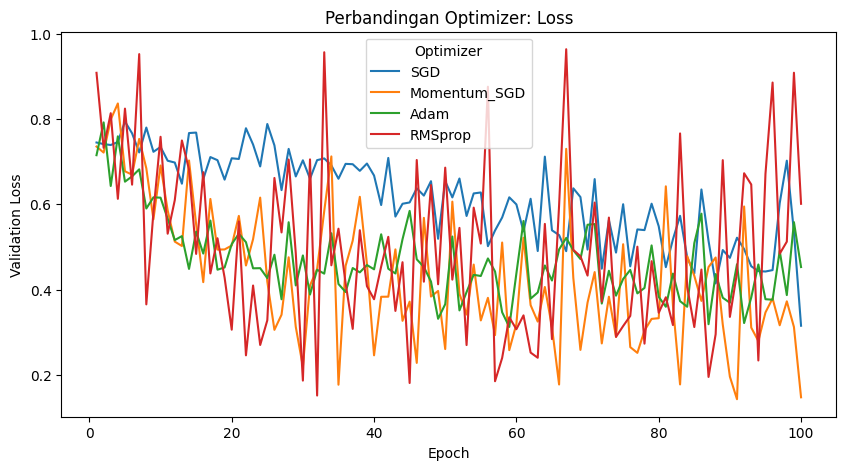

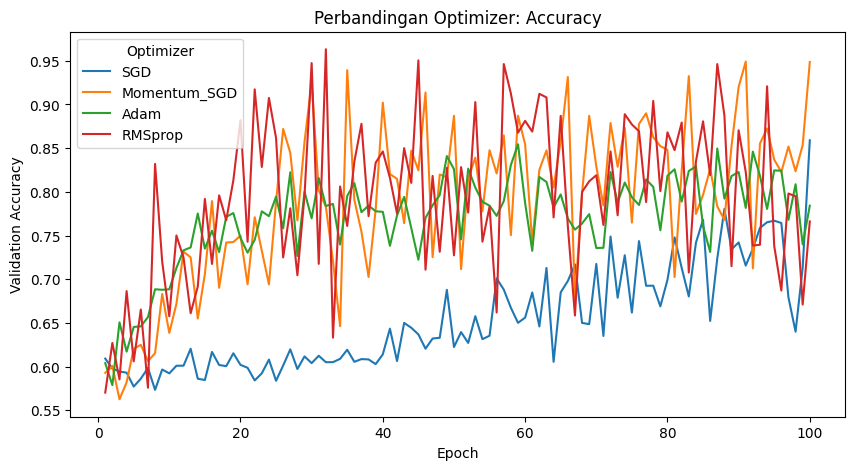

In [234]:
# Jalankan training untuk setiap optimizer
models_results = [train_and_evaluate(name, optimizers[name]) for name in optimizers]

# Menggabungkan hasil training dari semua optimizer
results = pd.concat([res["results"] for res in models_results], ignore_index=True)

# Menyimpan model yang telah dilatih
models = {name: res["model"] for name, res in zip(optimizers.keys(), models_results)}

# Plot perbandingan loss antar optimizer
plt.figure(figsize=(10, 5))
sns.lineplot(data=results, x="epoch", y="loss", hue="optimizer")
plt.title("Perbandingan Optimizer: Loss")
plt.xlabel("Epoch")
plt.ylabel("Validation Loss")
plt.legend(title="Optimizer")
plt.show()

# Plot perbandingan akurasi antar optimizer
plt.figure(figsize=(10, 5))
sns.lineplot(data=results, x="epoch", y="accuracy", hue="optimizer")
plt.title("Perbandingan Optimizer: Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend(title="Optimizer")
plt.show()

Grafik pertama menunjukkan perbandingan loss pada data validasi untuk berbagai optimizer. SGD memiliki tren loss yang lebih tinggi dan lebih stabil, sementara optimizer lain seperti Adam, RMSprop, dan Momentum_SGD memiliki loss yang lebih fluktuatif tetapi cenderung lebih rendah. Grafik kedua menunjukkan perbandingan akurasi validasi, di mana Adam, RMSprop, dan Momentum_SGD mencapai akurasi yang lebih tinggi dibandingkan dengan SGD, yang mengalami peningkatan akurasi lebih lambat. Dari kedua grafik, dapat disimpulkan bahwa **optimizer seperti Adam dan Momentum_SGD lebih efektif** dibandingkan dengan SGD dalam meningkatkan akurasi dan menurunkan loss.

In [235]:
# Mengevaluasi setiap model dengan data uji dan menyimpan hasilnya
evaluation_results = {}

for name, model in models.items():
    scores = model.evaluate(test_X, test_y, verbose=0)  # Evaluasi model
    evaluation_results[name] = {"Test Loss": scores[0], "Test Accuracy": scores[1]}

# Menampilkan hasil evaluasi untuk setiap optimizer
for name, result in evaluation_results.items():
    print(f"Optimizer: {name}")
    print(f"Test Loss: {result['Test Loss']:.4f}")
    print(f"Test Accuracy: {result['Test Accuracy']:.4f}")
    print("-" * 30)

Optimizer: SGD
Test Loss: 0.4179
Test Accuracy: 0.8294
------------------------------
Optimizer: Momentum_SGD
Test Loss: 0.4096
Test Accuracy: 0.8006
------------------------------
Optimizer: Adam
Test Loss: 0.2967
Test Accuracy: 0.8867
------------------------------
Optimizer: RMSprop
Test Loss: 0.3205
Test Accuracy: 0.8864
------------------------------


Berdasarkan hasil evaluasi pada data uji, optimizer Adam menunjukkan performa terbaik dengan test loss terendah (0.2967) dan test accuracy tertinggi (0.8867). Optimizer RMSprop memiliki performa yang mendekati Adam, namun dengan loss yang sedikit lebih tinggi (0.3205). Sementara itu, Momentum_SGD dan SGD memiliki loss yang lebih besar dan akurasi yang lebih rendah, menunjukkan bahwa mereka kurang efektif dalam mengoptimalkan model dibandingkan Adam. Oleh karena itu, **Adam merupakan pilihan terbaik untuk model ini** karena memberikan keseimbangan yang optimal antara minimisasi loss dan peningkatan akurasi.

# Pemodelan dengan *Tuning Learning Rate*

In [240]:
# Daftar learning rate yang akan diuji
learning_rates = [0.0001, 0.001, 0.01, 0.1]

# Fungsi untuk membuat model dengan learning rate tertentu
def create_model(learning_rate):
    model = Sequential([
        Dense(256, activation="relu", input_shape=(input_dim,)),  # Hidden Layer
        Dense(output_dim, activation="softmax")  # Output Layer
    ])

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(
        loss="categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"]
    )

    return model

# Fungsi untuk melatih model dan menyimpan hasil
def train_and_evaluate(lr_name, learning_rate):
    model = create_model(learning_rate)

    history = model.fit(
        train_X, train_y,
        shuffle=True,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        verbose=0
    )

    # Simpan hasil training dan validasi dalam DataFrame
    results = pd.DataFrame({
        "learning_rate": [lr_name] * 100,
        "epoch": list(range(1, 101)),
        "train_loss": history.history["loss"],
        "val_loss": history.history["val_loss"],
        "train_accuracy": history.history["accuracy"],
        "val_accuracy": history.history["val_accuracy"]
    })

    return {"model": model, "history": results}


Syntax diatas bertujuan untuk mengevaluasi pengaruh berbagai learning rate terhadap performa model neural network menggunakan optimizer Adam. Model yang digunakan memiliki satu hidden layer dengan 256 neuron dan output layer dengan aktivasi softmax. Fungsi `create_model` membangun model dengan learning rate tertentu, sedangkan `train_and_evaluate` melatih model selama 100 epoch dengan batch size 32 dan validation split 20%. Hasil pelatihan, termasuk loss dan akurasi pada data training serta validasi, disimpan dalam DataFrame untuk analisis lebih lanjut.

In [241]:
# Menyimpan hasil training dan model untuk setiap learning rate
results_list = {}
models = {}

for lr in learning_rates:
    lr_name = f"lr_{lr}"
    train_result = train_and_evaluate(lr_name, lr)

    models[lr_name] = train_result["model"]  # Simpan model
    results_list[lr_name] = train_result["history"]  # Simpan hasil training

# Gabungkan semua hasil training ke dalam satu dataframe
results = pd.concat(results_list.values(), ignore_index=True)
results

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


,learning_rate,epoch,train_loss,val_loss,train_accuracy,val_accuracy
0,lr_0.0001,1,0.585125,0.805910,0.695207,0.555295
1,lr_0.0001,2,0.517343,0.763142,0.771300,0.588716
2,lr_0.0001,3,0.508127,0.724662,0.775431,0.594255
3,lr_0.0001,4,0.504388,0.777751,0.776745,0.578858
4,lr_0.0001,5,0.501347,0.753998,0.777520,0.584397
...,...,...,...,...,...,...
395,lr_0.1,96,0.533907,1.147197,0.761677,0.296095
396,lr_0.1,97,0.536014,0.571134,0.760292,0.643917
397,lr_0.1,98,0.537935,0.779673,0.760480,0.555389
398,lr_0.1,99,0.534399,0.541329,0.763320,0.654994


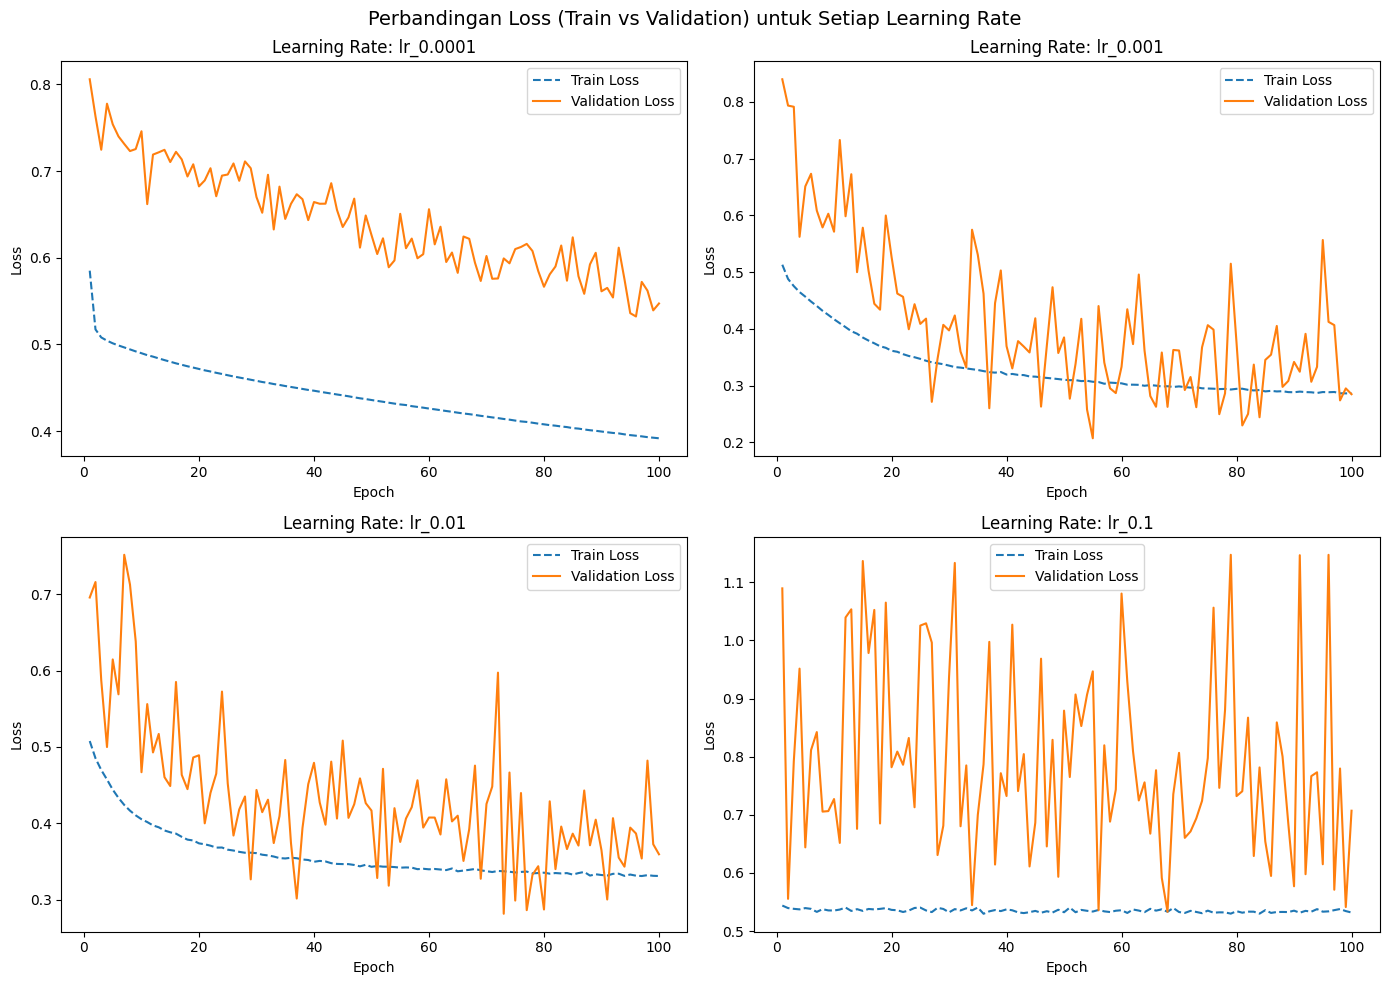

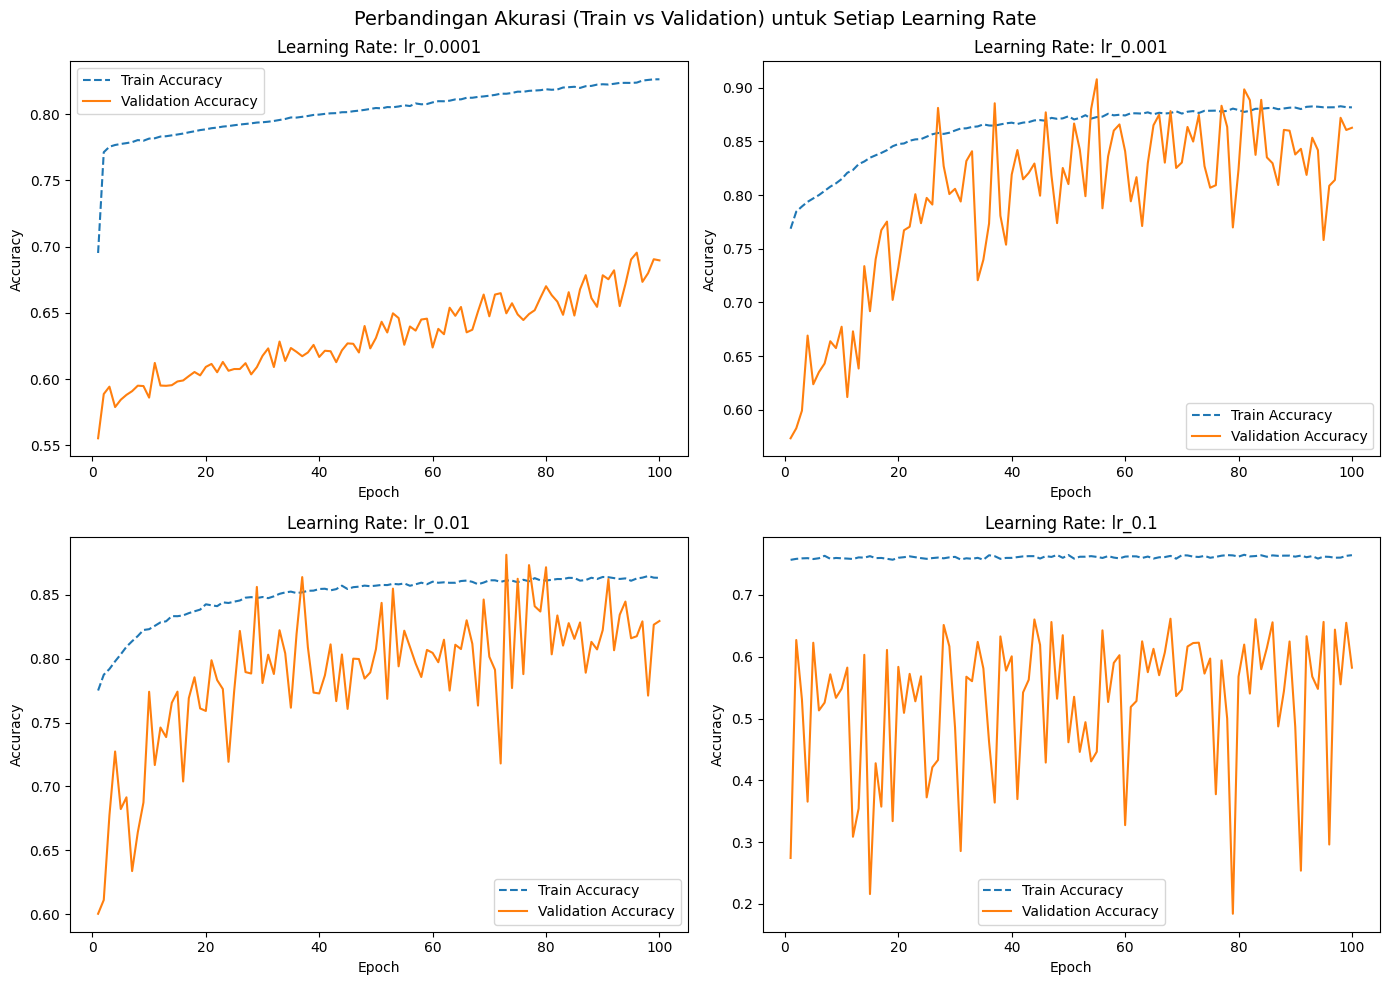

In [242]:
# Dapatkan daftar unique learning rate
unique_lrs = results["learning_rate"].unique()

# Buat subplot dengan 2 baris, 2 kolom
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten agar lebih mudah diakses dengan loop

# Loop untuk membuat grafik Loss per learning rate
for i, lr in enumerate(unique_lrs):
    subset = results[results["learning_rate"] == lr]

    sns.lineplot(ax=axes[i], data=subset, x="epoch", y="train_loss", label="Train Loss", linestyle="dashed")
    sns.lineplot(ax=axes[i], data=subset, x="epoch", y="val_loss", label="Validation Loss")

    axes[i].set_title(f"Learning Rate: {lr}")
    axes[i].set_xlabel("Epoch")
    axes[i].set_ylabel("Loss")
    axes[i].legend()

plt.suptitle("Perbandingan Loss (Train vs Validation) untuk Setiap Learning Rate", fontsize=14)
plt.tight_layout()
plt.show()

# Buat subplot dengan 2 baris, 2 kolom untuk Accuracy
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Loop untuk membuat grafik Accuracy per learning rate
for i, lr in enumerate(unique_lrs):
    subset = results[results["learning_rate"] == lr]

    sns.lineplot(ax=axes[i], data=subset, x="epoch", y="train_accuracy", label="Train Accuracy", linestyle="dashed")
    sns.lineplot(ax=axes[i], data=subset, x="epoch", y="val_accuracy", label="Validation Accuracy")

    axes[i].set_title(f"Learning Rate: {lr}")
    axes[i].set_xlabel("Epoch")
    axes[i].set_ylabel("Accuracy")
    axes[i].legend()

plt.suptitle("Perbandingan Akurasi (Train vs Validation) untuk Setiap Learning Rate", fontsize=14)
plt.tight_layout()
plt.show()

In [243]:
# Evaluasi setiap model pada data uji
for lr_name, model in models.items():
    scores = model.evaluate(test_X, test_y, verbose=0)  # Evaluasi model
    print(f"{lr_name}:")
    print(f"  - Test Loss: {scores[0]:.4f}")
    print(f"  - Test Accuracy: {scores[1]:.4f}")
    print("-" * 40)

lr_0.0001:
  - Test Loss: 0.3392
  - Test Accuracy: 0.8803
----------------------------------------
lr_0.001:
  - Test Loss: 0.2789
  - Test Accuracy: 0.8987
----------------------------------------
lr_0.01:
  - Test Loss: 0.3157
  - Test Accuracy: 0.8696
----------------------------------------
lr_0.1:
  - Test Loss: 0.4877
  - Test Accuracy: 0.8540
----------------------------------------


Hasil pengujian menunjukkan bahwa **learning rate 0.001 memberikan performa terbaik** dengan test loss terendah (0.2789) dan test accuracy tertinggi (0.8987), menandakan bahwa model mampu melakukan generalisasi dengan baik. Learning rate yang terlalu kecil (0.0001) menghasilkan akurasi yang cukup baik tetapi dengan loss yang lebih tinggi, menunjukkan bahwa konvergensi lebih lambat. Sementara itu, learning rate yang terlalu besar (0.01 dan 0.1) menyebabkan performa menurun, kemungkinan karena optimasi menjadi tidak stabil atau melewatkan titik optimal.

## Prediksi

In [246]:
# Melakukan prediksi pada data uji
prediksi = models["lr_0.001"].predict(test_X)
print(prediksi[:5])  # Menampilkan 5 prediksi pertama

97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0.90729594 0.09270404]
 [0.8709517  0.12904827]
 [0.90843946 0.09156056]
 [0.9739484  0.02605155]
 [0.36109397 0.63890594]]


Hasil prediksi menunjukkan probabilitas keluaran untuk dua kelas pada lima sampel pertama dari data uji. Nilai pada setiap baris merepresentasikan probabilitas model terhadap masing-masing kelas, dengan jumlahnya selalu 1. Misalnya, sampel pertama memiliki probabilitas 0.907 untuk kelas pertama dan 0.092 untuk kelas kedua, sehingga kemungkinan besar diklasifikasikan sebagai kelas pertama. Sampel keempat memiliki probabilitas 0.973 untuk kelas pertama, menunjukkan prediksi yang sangat yakin. Sebaliknya, sampel kelima lebih condong ke kelas kedua dengan probabilitas 0.639.

In [251]:
label_pred = np.argmax(prediksi, axis=1)

# Label sebenarnya dari dataset
label_true = df_test["y"].map({"no": 0, "yes": 1}).astype(int)

,y
0,0
1,0
2,0
4,0
5,0
...,...
4114,0
4115,0
4116,0
4117,0


# Evaluasi Model

In [252]:
# Menampilkan confusion matrix
cm = confusion_matrix(label_true, label_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[2549  171]
 [ 142  228]]


- True Negative (TN): 2549 sampel diklasifikasikan dengan benar sebagai negatif.  
- False Positive (FP): 171 sampel sebenarnya negatif tetapi salah diklasifikasikan sebagai positif.  
- False Negative (FN): 142 sampel sebenarnya positif tetapi salah diklasifikasikan sebagai negatif.  
- True Positive (TP): 228 sampel diklasifikasikan dengan benar sebagai positif.  

Model memiliki jumlah prediksi benar yang cukup tinggi, tetapi masih terdapat kesalahan terutama dalam mendeteksi kelas positif (FN=142).

In [253]:
# Menampilkan classification report (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(label_true, label_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      2720
           1       0.57      0.62      0.59       370

    accuracy                           0.90      3090
   macro avg       0.76      0.78      0.77      3090
weighted avg       0.90      0.90      0.90      3090



Classification report ini menunjukkan evaluasi performa model berdasarkan beberapa metrik:  

- Kelas 0 (No):
  - Precision: 0.95 → Dari semua prediksi kelas 0, 95% benar.  
  - Recall: 0.94 → Dari semua data yang seharusnya kelas 0, 94% terdeteksi dengan benar.  
  - F1-score: 0.94 → Keseimbangan antara precision dan recall cukup tinggi.  

- Kelas 1 (Yes):  
  - Precision: 0.57 → Dari semua prediksi kelas 1, hanya 57% yang benar.  
  - Recall:*0.62 → Dari semua data yang seharusnya kelas 1, hanya 62% yang terdeteksi dengan benar.  
  - F1-score: 0.59 → Performa model dalam mendeteksi kelas positif masih kurang optimal.  

- Akurasi keseluruhan: 0.90 → Model mampu mengklasifikasikan 90% data dengan benar.  
- Macro avg: 0.76 (precision), 0.78 (recall), dan 0.77 (f1-score) → Rata-rata untuk kedua kelas, tanpa memperhitungkan jumlah sampel.  
- Weighted avg: 0.90 untuk semua metrik → Rata-rata tertimbang berdasarkan jumlah sampel di setiap kelas, menunjukkan bahwa model lebih dominan dalam mengklasifikasikan kelas mayoritas (kelas 0).  

Secara keseluruhan, model bekerja sangat baik pada kelas 'no' tetapi kurang optimal dalam mendeteksi kelas 'yes', yang terlihat dari precision dan recall yang lebih rendah pada kelas 1.

In [255]:
# Mengevaluasi model menggunakan data uji
scores = models["lr_0.001"].evaluate(test_X, test_y, verbose=0)
print(f"\nTest Loss: {scores[0]:.4f}")
print(f"Test Accuracy: {scores[1]:.4f}")


Test Loss: 0.2789
Test Accuracy: 0.8987


Model memiliki **test loss sebesar 0.2789**, yang menunjukkan bahwa error prediksi masih ada tetapi relatif kecil. **Akurasi pengujian sebesar 89.87%** menunjukkan bahwa model cukup baik dalam mengklasifikasikan data uji, meskipun masih ada kemungkinan kesalahan, terutama pada kelas dengan jumlah sampel lebih sedikit.

#Menyimpan dan Memuat Model

In [257]:
# Menyimpan model dalam format keras
models["lr_0.001"].save("model_nn_sgd.keras")

# Memuat model dari file keras
new_model = load_model("model_nn_sgd.keras")

# Kompilasi ulang sebelum evaluasi
new_model.compile(
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Menampilkan arsitektur model yang dimuat
new_model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                     │ (None, 64)                  │           3,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,522 (13.76 KB)

 Trainable params: 3,522 (13.76 KB)

 Non-trainable params: 0 (0.00 B)

Model **"sequential_22"** terdiri dari **dua lapisan dense**. Lapisan pertama adalah **Dense(64)** dengan **3.392 parameter**, berfungsi sebagai hidden layer dengan aktivasi ReLU. Lapisan kedua adalah **Dense(2)** dengan **130 parameter**, yang berfungsi sebagai output layer dengan aktivasi softmax untuk klasifikasi dua kelas. Total parameter yang dapat dilatih adalah **3.522**, menunjukkan model yang cukup ringan dan sederhana.

# Kesimpulan

Berdasarkan hasil pemodelan yang dilakukan pada tiga arsitektur model yang berbeda, model dengan **dua hidden layer** dan **dropout** menghasilkan performa terbaik dengan **nilai test loss sebesar 0.1341** dan **test accuracy mencapai 94.92%**. Model ini menunjukkan generalisasi yang lebih baik dibandingkan model lainnya, sehingga dipilih sebagai model terbaik untuk digunakan dalam prediksi.

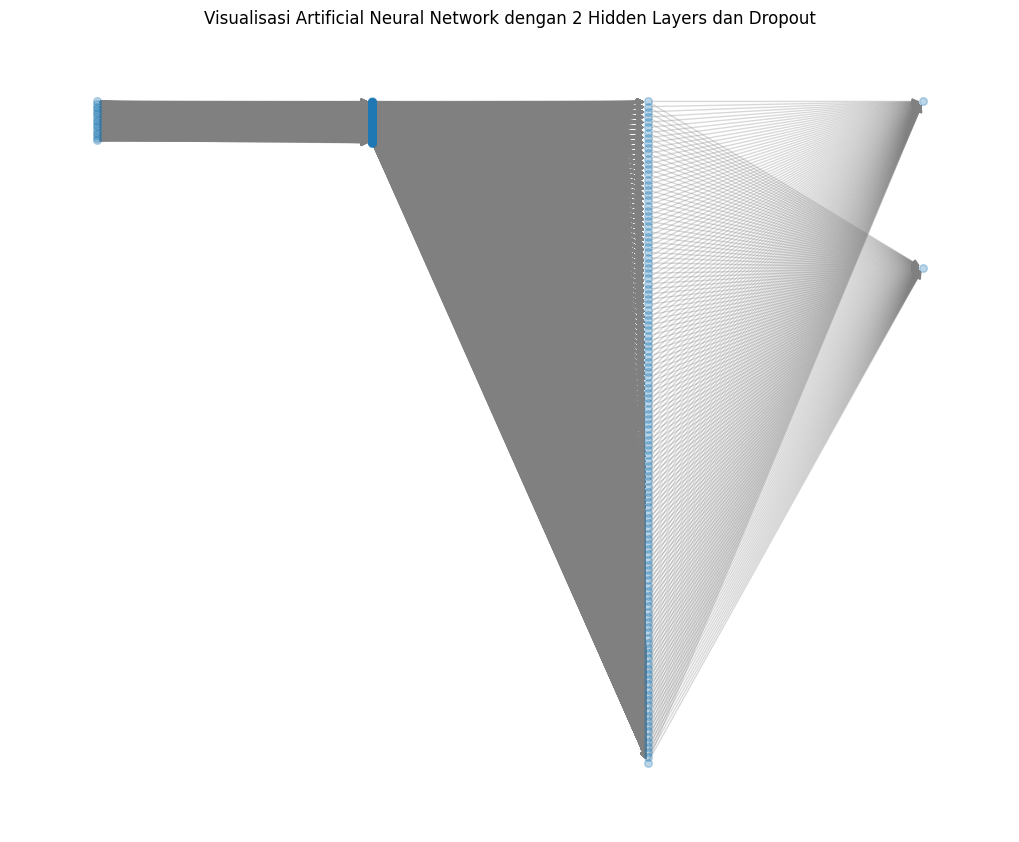

In [260]:
import matplotlib.pyplot as plt
import networkx as nx

# Jumlah neuron di tiap layer
input_neurons = 16
hidden_neurons_1 = 256
hidden_neurons_2 = 128
output_neurons = 2

# Buat graph
G = nx.DiGraph()
pos = {}  # Menyimpan posisi setiap node

# Tambahkan input layer
for i in range(input_neurons):
    G.add_node(f"I{i}", layer=0)
    pos[f"I{i}"] = (0, -i)

# Tambahkan hidden layer 1
for i in range(hidden_neurons_1):
    G.add_node(f"H1_{i}", layer=1)
    pos[f"H1_{i}"] = (1, -i * (input_neurons / hidden_neurons_1))

# Tambahkan hidden layer 2
for i in range(hidden_neurons_2):
    G.add_node(f"H2_{i}", layer=2)
    pos[f"H2_{i}"] = (2, -i * (hidden_neurons_1 / hidden_neurons_2))

# Tambahkan output layer
for i in range(output_neurons):
    G.add_node(f"O{i}", layer=3)
    pos[f"O{i}"] = (3, -i * (hidden_neurons_2 / output_neurons))

# Buat edge dari input ke hidden layer 1
for i in range(input_neurons):
    for j in range(hidden_neurons_1):
        G.add_edge(f"I{i}", f"H1_{j}")

# Buat edge dari hidden layer 1 ke hidden layer 2
for i in range(hidden_neurons_1):
    for j in range(hidden_neurons_2):
        G.add_edge(f"H1_{i}", f"H2_{j}")

# Buat edge dari hidden layer 2 ke output layer
for i in range(hidden_neurons_2):
    for j in range(output_neurons):
        G.add_edge(f"H2_{i}", f"O{j}")

# Plot jaringan saraf
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=False, node_size=30, edge_color="gray", alpha=0.3)
plt.title("Visualisasi Artificial Neural Network dengan 2 Hidden Layers dan Dropout")
plt.show()

Berdasarkan hasil visualisasi dari model ANN dengan 2 layers, pola yang terbentuk tampak kompleks dan tidak dapat diidentifikasi secara kasat mata. Oleh karena itu, penggunaan satu hidden layer dapat dipertimbangkan untuk menyederhanakan interpretasi serta mempermudah visualisasi model. Selain itu, nilai akurasi yang diperoleh masih tergolong baik, dan nilai loss yang dihasilkan cukup rendah, sehingga model dengan satu hidden layer tetap dapat memberikan performa yang optimal tanpa mengorbankan terlalu banyak akurasi.

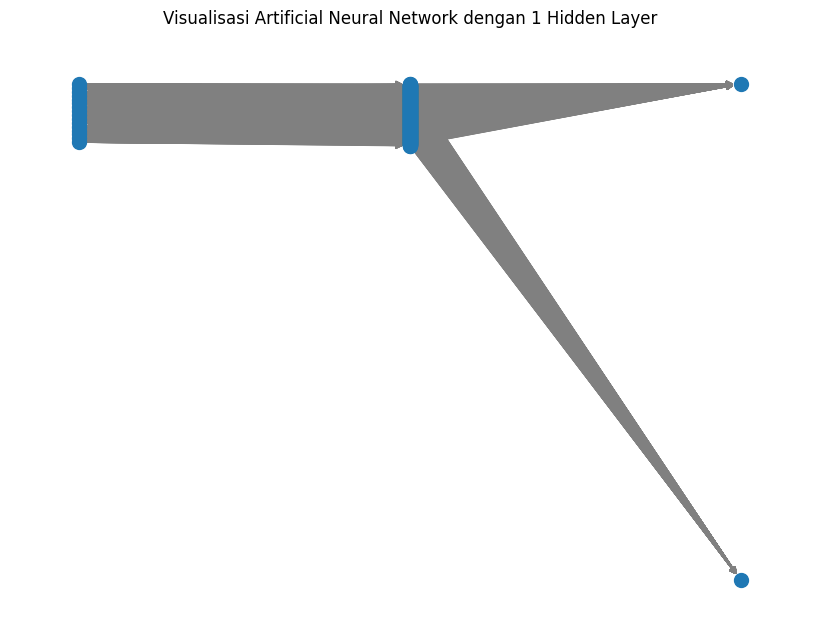

In [261]:
# Jumlah neuron di tiap layer
input_neurons = 16
hidden_neurons = 256
output_neurons = 2

# Buat graph
G = nx.DiGraph()

# Posisi node
pos = {}

# Tambahkan input layer
for i in range(input_neurons):
    G.add_node(f"I{i}", layer=0)
    pos[f"I{i}"] = (0, -i)

# Tambahkan hidden layer
for i in range(hidden_neurons):
    G.add_node(f"H{i}", layer=1)
    pos[f"H{i}"] = (1, -i * (input_neurons / hidden_neurons))

# Tambahkan output layer
for i in range(output_neurons):
    G.add_node(f"O{i}", layer=2)
    pos[f"O{i}"] = (2, -i * (hidden_neurons / output_neurons))

# Buat edge dari input ke hidden layer
for i in range(input_neurons):
    for j in range(hidden_neurons):
        G.add_edge(f"I{i}", f"H{j}")

# Buat edge dari hidden ke output layer
for i in range(hidden_neurons):
    for j in range(output_neurons):
        G.add_edge(f"H{i}", f"O{j}")

# Plot jaringan saraf
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=False, node_size=100, edge_color="gray")
plt.title("Visualisasi Artificial Neural Network dengan 1 Hidden Layer")
plt.show()
